<a href="https://colab.research.google.com/github/Olatunjiomotayo/Cambridgeshire-Road-Traffic-Collision/blob/main/RTC_to_bi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from scipy.stats import shapiro, kstest, anderson
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import os

In [2]:
Filepath = "/content/Cambridgeshire Road Traffic Collision Data_13.xlsx"

In [3]:
# Read all sheets into a dictionary of DataFrames
dataframes = pd.read_excel(Filepath, sheet_name = None)

In [4]:
dataframes.keys()

dict_keys(['FAQs', 'Crashes', 'Vehicles', 'Casualties'])

In [5]:
remove_faq = dataframes.pop("FAQs", None)

In [6]:
dataframes.keys()

dict_keys(['Crashes', 'Vehicles', 'Casualties'])

In [7]:
pd.set_option("display.max_columns", None)
Crashes_df = pd.read_excel(Filepath, sheet_name = "Crashes")
Crashes_df

,Police Force,Collision Reference No.,Severity,No. Vehicles,No. Casualties,Date,Day,Time,Local Authority (assigned by police),Easting,Northing,First Road Class,First Road Number,Road Type,Speed Limit,Junction Detail,Junction Control,Second Road Class,Second Road Number,Pedestrian Crossing (Human),Pedestrian Crossing (Physical),Lighting Conditions,Weather,Road Conditions,Special Conditions,Carriageway Hazards,Police in attendance?,Types of turn being made,Collision Location
0,Bedfordshire,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,556526,277097,A,142.0,Single carriageway,60,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,Dry,NaN,NaN,Yes,No turn,"SOHAM ROAD (A142) (A142), STUNTNEY, CAMBRIDGES..."
1,Bedfordshire,1185880,Fatal,1,1,08-Apr-2022,Friday,20:30,South Cambridgeshire,543444,253892,Motorway,11.0,Dual carriageway,70,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Darkness: no street lighting,Fine without high winds,Dry,NaN,NaN,Yes,No turn,"M11, SOUTH CAMBS DISTRICT COUNCIL, CAMBRIDGESHIRE"
2,Bedfordshire,1240579,Fatal,1,1,18-Sep-2022,Sunday,19:03,Fenland,548875,298218,B,1098.0,Single carriageway,50,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,Dry,NaN,NaN,Yes,No turn,SIXTEEN FOOT BANK (B1098) - 54 METRES FROM JU...
3,Bedfordshire,1319268,Slight,2,1,12-Jun-2023,Monday,15:55,Cambridge City,544357,257368,Unclassified,NaN,Single carriageway,30,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,NaN,NaN,NaN,No - self reported,No turn,LAMMAS FIELD
4,Bedfordshire,293443,Slight,2,1,11-May-2018,Friday,07:49,East Cambridgeshire,549643,279187,A,142.0,Single carriageway,60,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,Dry,NaN,NaN,Yes,No turn,A142 WITCHFORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,NaN,1285281,Slight,2,1,08-Mar-2023,Wednesday,13:05,Huntingdonshire,530355,280107,B,1040.0,Single carriageway,30,T or staggered junction,Give way or uncontrolled,B,1040.0,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Snowing without high winds,NaN,NaN,NaN,No - self reported,No turn,"RAMSEY ROAD, WARBOYS, CAMBRIDGESHIRE"
8367,NaN,1288582,Slight,2,1,17-Mar-2023,Friday,09:30,East Cambridgeshire,553046,278862,A,10.0,Roundabout,50,Roundabout,Give way or uncontrolled,A,10.0,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,NaN,NaN,NaN,No - self reported,No turn,DOWNHAM ROAD (A10) AT JUNCTION WITH CAMBRIDGE ...
8368,NaN,1291993,Slight,2,1,18-Mar-2023,Saturday,14:27,South Cambridgeshire,548018,254692,Unclassified,NaN,Single carriageway,60,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,Dry,NaN,NaN,Yes,No turn,CHERRY HINTON ROAD - 169 METRES FROM JUNCTION ...
8369,NaN,1303876,Slight,2,1,24-Apr-2023,Monday,08:15,Huntingdonshire,518387,260407,Unclassified,NaN,Single carriageway,30,Not at or within 20 metres of junction,NaN,NaN,NaN,None within 50 metres,No physical crossing facility within 50 metres,Daylight,Fine without high winds,Dry,NaN,NaN,No - self reported,No turn,TEBBUTTS ROAD - NR JCN WITH MOORE'S WALK


In [8]:
Crashes_df.columns

Index(['Police Force', 'Collision Reference No.', 'Severity', 'No. Vehicles',
       'No. Casualties', 'Date', 'Day', 'Time',
       'Local Authority (assigned by police)', 'Easting', 'Northing',
       'First Road Class', 'First Road Number', 'Road Type', 'Speed Limit',
       'Junction Detail', 'Junction Control', 'Second Road Class',
       'Second Road Number', 'Pedestrian Crossing (Human)',
       'Pedestrian Crossing (Physical)', 'Lighting Conditions', 'Weather',
       'Road Conditions', 'Special Conditions', 'Carriageway Hazards',
       'Police in attendance?', 'Types of turn being made',
       'Collision Location'],
      dtype='object')

In [9]:
Crashes_df.columns = Crashes_df.columns.str.replace(" ", "_")
Crashes_df.columns

Index(['Police_Force', 'Collision_Reference_No.', 'Severity', 'No._Vehicles',
       'No._Casualties', 'Date', 'Day', 'Time',
       'Local_Authority_(assigned_by_police)', 'Easting', 'Northing',
       'First_Road_Class', 'First_Road_Number', 'Road_Type', 'Speed_Limit',
       'Junction_Detail', 'Junction_Control', 'Second_Road_Class',
       'Second_Road_Number', 'Pedestrian_Crossing_(Human)',
       'Pedestrian_Crossing_(Physical)', 'Lighting_Conditions', 'Weather',
       'Road_Conditions', 'Special_Conditions', 'Carriageway_Hazards',
       'Police_in_attendance?', 'Types_of_turn_being_made',
       'Collision_Location'],
      dtype='object')

In [10]:
Crashes_df.isnull().sum()

Police_Force                               9
Collision_Reference_No.                    0
Severity                                   0
No._Vehicles                               0
No._Casualties                             0
Date                                       0
Day                                        0
Time                                       0
Local_Authority_(assigned_by_police)       0
Easting                                    0
Northing                                   0
First_Road_Class                           0
First_Road_Number                       2672
Road_Type                                  0
Speed_Limit                                0
Junction_Detail                            0
Junction_Control                        4248
Second_Road_Class                       4237
Second_Road_Number                      6726
Pedestrian_Crossing_(Human)               60
Pedestrian_Crossing_(Physical)            60
Lighting_Conditions                        0
Weather   

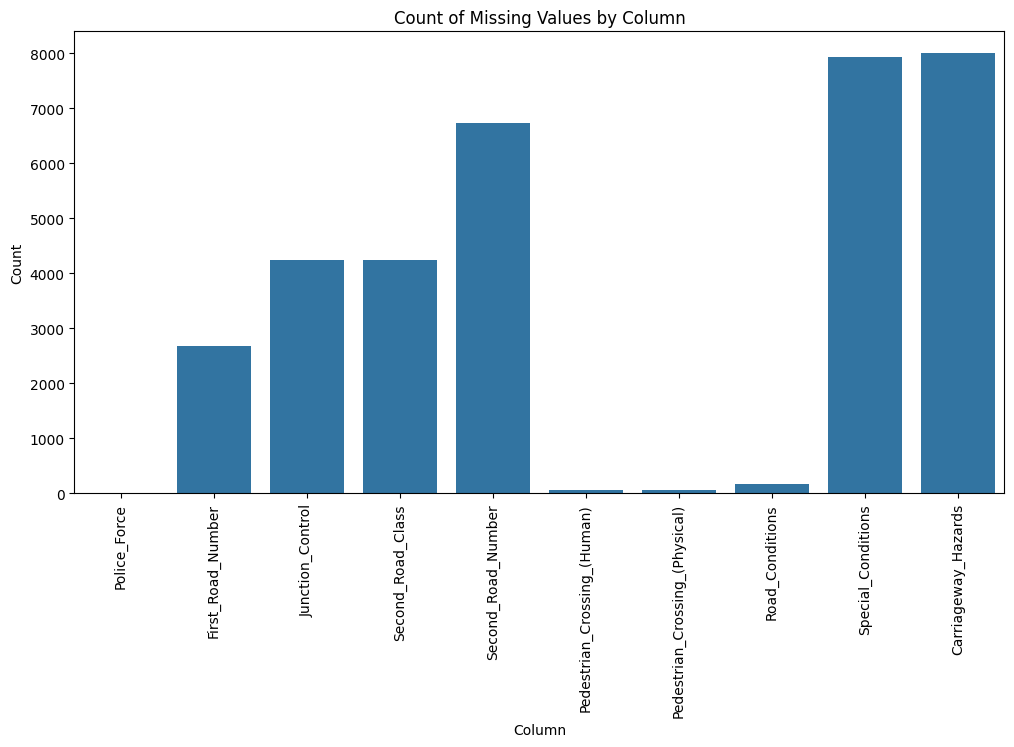

In [11]:
# Count missing values for each column
missing_counts = Crashes_df.isnull().sum()

# Filter out columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x = missing_counts.index, y = missing_counts.values)
plt.title("Count of Missing Values by Column")
plt.xticks(rotation = 90)
plt.xlabel("Column")
plt.ylabel("Count")
plt.show()

In [12]:
Crashes_df = Crashes_df.drop(columns = ["Police_Force", "Easting", "Northing", "First_Road_Class", "First_Road_Number", "Junction_Detail", \
                          "Pedestrian_Crossing_(Human)", "Police_in_attendance?", "Road_Type", "Junction_Control", "Second_Road_Class", \
                           "Second_Road_Number", "Special_Conditions", "Carriageway_Hazards", "Carriageway_Hazards", "Pedestrian_Crossing_(Physical)", \
                           "Types_of_turn_being_made", "Collision_Location"])

In [13]:
Crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Collision_Reference_No.               8371 non-null   int64 
 1   Severity                              8371 non-null   object
 2   No._Vehicles                          8371 non-null   int64 
 3   No._Casualties                        8371 non-null   int64 
 4   Date                                  8371 non-null   object
 5   Day                                   8371 non-null   object
 6   Time                                  8371 non-null   object
 7   Local_Authority_(assigned_by_police)  8371 non-null   object
 8   Speed_Limit                           8371 non-null   int64 
 9   Lighting_Conditions                   8371 non-null   object
 10  Weather                               8371 non-null   object
 11  Road_Conditions               

In [14]:
Crashes_df['Road_Conditions'].fillna('Unknown', inplace=True)

In [15]:
Crashes_df.info()
Crashes_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Collision_Reference_No.               8371 non-null   int64 
 1   Severity                              8371 non-null   object
 2   No._Vehicles                          8371 non-null   int64 
 3   No._Casualties                        8371 non-null   int64 
 4   Date                                  8371 non-null   object
 5   Day                                   8371 non-null   object
 6   Time                                  8371 non-null   object
 7   Local_Authority_(assigned_by_police)  8371 non-null   object
 8   Speed_Limit                           8371 non-null   int64 
 9   Lighting_Conditions                   8371 non-null   object
 10  Weather                               8371 non-null   object
 11  Road_Conditions               

,Collision_Reference_No.,Severity,No._Vehicles,No._Casualties,Date,Day,Time,Local_Authority_(assigned_by_police),Speed_Limit,Lighting_Conditions,Weather,Road_Conditions
0,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry
1,1185880,Fatal,1,1,08-Apr-2022,Friday,20:30,South Cambridgeshire,70,Darkness: no street lighting,Fine without high winds,Dry
2,1240579,Fatal,1,1,18-Sep-2022,Sunday,19:03,Fenland,50,Daylight,Fine without high winds,Dry
3,1319268,Slight,2,1,12-Jun-2023,Monday,15:55,Cambridge City,30,Daylight,Fine without high winds,Unknown
4,293443,Slight,2,1,11-May-2018,Friday,07:49,East Cambridgeshire,60,Daylight,Fine without high winds,Dry
...,...,...,...,...,...,...,...,...,...,...,...,...
8366,1285281,Slight,2,1,08-Mar-2023,Wednesday,13:05,Huntingdonshire,30,Daylight,Snowing without high winds,Unknown
8367,1288582,Slight,2,1,17-Mar-2023,Friday,09:30,East Cambridgeshire,50,Daylight,Fine without high winds,Unknown
8368,1291993,Slight,2,1,18-Mar-2023,Saturday,14:27,South Cambridgeshire,60,Daylight,Fine without high winds,Dry
8369,1303876,Slight,2,1,24-Apr-2023,Monday,08:15,Huntingdonshire,30,Daylight,Fine without high winds,Dry


### **I will proceed to clean Vehicle Sheet**

In [16]:
Vehicles_df = pd.read_excel(Filepath, sheet_name = "Vehicles")
Vehicles_df

,Collision Reference No.,Vehicle Reference No.,Vehicle Type,Vehicle type (if other),Tow,Vehicle Manoeuvre,Vehicle moving from,Vehicle moving to,Vehicle location,Vehicle near junction?,Skidding,Vehicle hit object on carriageway?,Vehicle left carriageway?,Vehicle hit object off carriageway?,Vehicle first point of impact,Driver Sex,Driver Age,Alcohol breath test,Hit and run?,Journey purpose,Driving license,Left Hand Drive?,Vehicle type group
0,1011395,1,Car,NaN,No tow or articulation,Going ahead other,South west,North east,Entering lay-by or hard shoulder,"Not at, or within 20 metres of, junction","No skidding, jack-knifing or overturning",NaN,Left carriageway nearside,NaN,Front,Male,28.0,Not requested,Not hit and run,Not Known,Full,No,Car
1,1011395,2,Goods vehicle 7.5 tonnes mgw and over,NaN,Articulated vehicle,Parked,South west,North east,On lay-by or hard shoulder,"Not at, or within 20 metres of, junction","No skidding, jack-knifing or overturning",NaN,Did not leave carriageway,NaN,Back,Male,52.0,Negative,Not hit and run,Journey as part of work,Full,No,HGV
2,1012210,1,Car,NaN,No tow or articulation,Going ahead other,South west,South east,On main carriageway - not in restricted lane,"Not at, or within 20 metres of, junction",Skidded and overturned,NaN,Left carriageway nearside,NaN,Front,Female,68.0,Negative,Not hit and run,Not Known,Not Known,No,Car
3,1017655,1,Car,NaN,No tow or articulation,Going ahead right hand bend,South west,East,On main carriageway - not in restricted lane,Approaching junction or waiting/parked at junc...,"No skidding, jack-knifing or overturning",NaN,Did not leave carriageway,NaN,Front,Female,54.0,Not requested,Not hit and run,Not Known,Not Known,No,Car
4,1017655,2,Goods vehicle – unknown weight,NaN,No tow or articulation,Turning right,North,South west,On main carriageway - not in restricted lane,Approaching junction or waiting/parked at junc...,"No skidding, jack-knifing or overturning",NaN,Did not leave carriageway,NaN,Front,Male,21.0,Not requested,Not hit and run,Not Known,Not Known,No,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15730,1440724,3,Van/Goods vehicle 3.5 tonnes maximum gross wei...,NaN,No tow or articulation,Going ahead other,North,South,On main carriageway - not in restricted lane,"Not at, or within 20 metres of, junction","No skidding, jack-knifing or overturning",NaN,Did not leave carriageway,NaN,Front,Male,57.0,Negative,Not hit and run,Journey as part of work,Full,No,LGV
15731,1427577,1,Car,NaN,No tow or articulation,Turning right,East,North,On main carriageway - not in restricted lane,Approaching junction or waiting/parked at junc...,"No skidding, jack-knifing or overturning",NaN,Did not leave carriageway,NaN,Offside,Male,43.0,Negative,Not hit and run,Not Known,NaN,No,Car
15732,1427577,2,Motorcycle – unknown cc,NaN,No tow or articulation,Overtaking moving vehicle on its offside,East,West,On main carriageway - not in restricted lane,Approaching junction or waiting/parked at junc...,"No skidding, jack-knifing or overturning",NaN,Left carriageway offside,NaN,Front,Male,38.0,Negative,Not hit and run,Not Known,Full,No,Motorcycle
15733,1443956,1,Car,NaN,No tow or articulation,Turning right,North,West,On main carriageway - not in restricted lane,Mid junction - on roundabout or on main road,"No skidding, jack-knifing or overturning",NaN,Did not leave carriageway,NaN,Offside,Female,68.0,Negative,Not hit and run,Other,Full,No,Car


In [17]:
Vehicles_df.columns

Index(['Collision Reference No.', 'Vehicle Reference No.', 'Vehicle Type',
       'Vehicle type (if other)', 'Tow', 'Vehicle Manoeuvre',
       'Vehicle moving from', 'Vehicle moving to', 'Vehicle location',
       'Vehicle near junction?', 'Skidding',
       'Vehicle hit object on carriageway?', 'Vehicle left carriageway?',
       'Vehicle hit object off carriageway?', 'Vehicle first point of impact',
       'Driver Sex', 'Driver Age', 'Alcohol breath test', 'Hit and run?',
       'Journey purpose', 'Driving license', 'Left Hand Drive?',
       'Vehicle type group'],
      dtype='object')

In [18]:
Vehicles_df.columns = Vehicles_df.columns.str.replace(" ", "_")
Vehicles_df.columns

Index(['Collision_Reference_No.', 'Vehicle_Reference_No.', 'Vehicle_Type',
       'Vehicle_type_(if_other)', 'Tow', 'Vehicle_Manoeuvre',
       'Vehicle_moving_from', 'Vehicle_moving_to', 'Vehicle_location',
       'Vehicle_near_junction?', 'Skidding',
       'Vehicle_hit_object_on_carriageway?', 'Vehicle_left_carriageway?',
       'Vehicle_hit_object_off_carriageway?', 'Vehicle_first_point_of_impact',
       'Driver_Sex', 'Driver_Age', 'Alcohol_breath_test', 'Hit_and_run?',
       'Journey_purpose', 'Driving_license', 'Left_Hand_Drive?',
       'Vehicle_type_group'],
      dtype='object')

In [19]:
Vehicles_df.isnull().sum()

Collision_Reference_No.                    0
Vehicle_Reference_No.                      0
Vehicle_Type                              24
Vehicle_type_(if_other)                15582
Tow                                      141
Vehicle_Manoeuvre                         82
Vehicle_moving_from                      500
Vehicle_moving_to                        502
Vehicle_location                         131
Vehicle_near_junction?                    15
Skidding                                 152
Vehicle_hit_object_on_carriageway?     15037
Vehicle_left_carriageway?                159
Vehicle_hit_object_off_carriageway?    14410
Vehicle_first_point_of_impact            174
Driver_Sex                                 0
Driver_Age                              1684
Alcohol_breath_test                       48
Hit_and_run?                               0
Journey_purpose                            0
Driving_license                         1351
Left_Hand_Drive?                        2919
Vehicle_ty

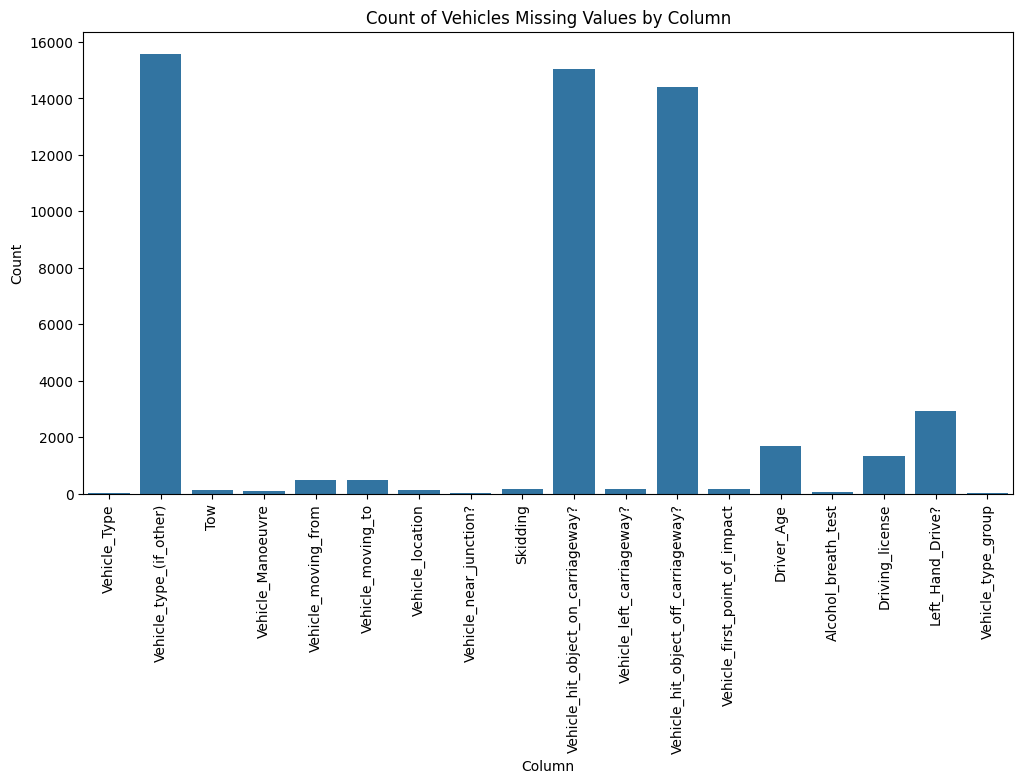

In [20]:
# Count missing values for each column
Vehicles_missing_count = Vehicles_df.isnull().sum()

# Filter out columns with missing values
Vehicles_missing_count = Vehicles_missing_count[Vehicles_missing_count > 0]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x = Vehicles_missing_count.index, y = Vehicles_missing_count.values)
plt.title("Count of Vehicles Missing Values by Column")
plt.xticks(rotation = 90)
plt.xlabel("Column")
plt.ylabel("Count")
plt.show()

In [21]:
Vehicles_df = Vehicles_df.drop(columns = ["Vehicle_Reference_No.", "Vehicle_type_(if_other)", "Vehicle_Type", "Vehicle_Manoeuvre", "Vehicle_hit_object_on_carriageway?", \
                            "Vehicle_hit_object_off_carriageway?", "Tow", "Vehicle_moving_from", "Vehicle_moving_to", \
                            "Vehicle_location", "Vehicle_near_junction?", "Skidding", "Vehicle_left_carriageway?", "Hit_and_run?", "Journey_purpose", \
                            "Left_Hand_Drive?", "Alcohol_breath_test", "Driving_license"])

In [22]:
Vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15735 entries, 0 to 15734
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Collision_Reference_No.        15735 non-null  int64  
 1   Vehicle_first_point_of_impact  15561 non-null  object 
 2   Driver_Sex                     15735 non-null  object 
 3   Driver_Age                     14051 non-null  float64
 4   Vehicle_type_group             15719 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 614.8+ KB


In [23]:
Vehicles_df.duplicated().sum()

57

In [24]:
Vehicles_df.drop_duplicates(inplace = True)

In [25]:
Vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15678 entries, 0 to 15734
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Collision_Reference_No.        15678 non-null  int64  
 1   Vehicle_first_point_of_impact  15504 non-null  object 
 2   Driver_Sex                     15678 non-null  object 
 3   Driver_Age                     14036 non-null  float64
 4   Vehicle_type_group             15662 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 734.9+ KB


In [26]:
Vehicles_df["Driver_Age"].fillna(Vehicles_df["Driver_Age"].median(), inplace=True)

In [27]:
Vehicles_df.dropna(inplace = True)

In [28]:
Vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15490 entries, 0 to 15734
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Collision_Reference_No.        15490 non-null  int64  
 1   Vehicle_first_point_of_impact  15490 non-null  object 
 2   Driver_Sex                     15490 non-null  object 
 3   Driver_Age                     15490 non-null  float64
 4   Vehicle_type_group             15490 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 726.1+ KB


In [29]:
Merge1_df = pd.merge(Crashes_df, Vehicles_df, on = "Collision_Reference_No.", how = "inner")
Merge1_df

,Collision_Reference_No.,Severity,No._Vehicles,No._Casualties,Date,Day,Time,Local_Authority_(assigned_by_police),Speed_Limit,Lighting_Conditions,Weather,Road_Conditions,Vehicle_first_point_of_impact,Driver_Sex,Driver_Age,Vehicle_type_group
0,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23.0,Motorcycle
1,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Offside,Female,40.0,Car
2,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Front,Male,29.0,Car
3,1185880,Fatal,1,1,08-Apr-2022,Friday,20:30,South Cambridgeshire,70,Darkness: no street lighting,Fine without high winds,Dry,Front,Male,21.0,Car
4,1240579,Fatal,1,1,18-Sep-2022,Sunday,19:03,Fenland,50,Daylight,Fine without high winds,Dry,Front,Male,43.0,LGV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15485,1291993,Slight,2,1,18-Mar-2023,Saturday,14:27,South Cambridgeshire,60,Daylight,Fine without high winds,Dry,Back,Female,73.0,Car
15486,1303876,Slight,2,1,24-Apr-2023,Monday,08:15,Huntingdonshire,30,Daylight,Fine without high winds,Dry,Front,Female,39.0,Car
15487,1303876,Slight,2,1,24-Apr-2023,Monday,08:15,Huntingdonshire,30,Daylight,Fine without high winds,Dry,Back,Male,35.0,LGV
15488,1306563,Serious,2,3,14-Mar-2023,Tuesday,12:50,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27.0,LGV


In [30]:
Merge1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Collision_Reference_No.               15490 non-null  int64  
 1   Severity                              15490 non-null  object 
 2   No._Vehicles                          15490 non-null  int64  
 3   No._Casualties                        15490 non-null  int64  
 4   Date                                  15490 non-null  object 
 5   Day                                   15490 non-null  object 
 6   Time                                  15490 non-null  object 
 7   Local_Authority_(assigned_by_police)  15490 non-null  object 
 8   Speed_Limit                           15490 non-null  int64  
 9   Lighting_Conditions                   15490 non-null  object 
 10  Weather                               15490 non-null  object 
 11  Road_Conditions

In [31]:
Merge1_df.duplicated().sum()

0

In [32]:
Merge1_df.drop_duplicates(inplace = True)

In [33]:
Merge1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Collision_Reference_No.               15490 non-null  int64  
 1   Severity                              15490 non-null  object 
 2   No._Vehicles                          15490 non-null  int64  
 3   No._Casualties                        15490 non-null  int64  
 4   Date                                  15490 non-null  object 
 5   Day                                   15490 non-null  object 
 6   Time                                  15490 non-null  object 
 7   Local_Authority_(assigned_by_police)  15490 non-null  object 
 8   Speed_Limit                           15490 non-null  int64  
 9   Lighting_Conditions                   15490 non-null  object 
 10  Weather                               15490 non-null  object 
 11  Road_Conditions

In [34]:
Casualties_df = pd.read_excel(Filepath, sheet_name = "Casualties")
Casualties_df

,Collision Reference No.,Police Force,Vehicle reference no,Casualty reference no.,Casualty type,Casualty sex,Casualty age,Casualty severity,Pedestrian location,Pedestrian movement,Pedestrian direction,Seat belt used?,Car passenger?,Bus/coach passenger?,Road worker?,Cycle helmet worn?,Casualty Vehicle group
0,1011395,NaN,1,1,Driver or rider,Male,28.0,Fatal,NaN,NaN,NaN,Unknown,Not a car passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car
1,1012210,NaN,1,1,Driver or rider,Female,68.0,Slight,NaN,NaN,NaN,Worn but not independently confirmed,Not a car passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car
2,1017655,NaN,1,1,Driver or rider,Female,54.0,Slight,NaN,NaN,NaN,Not applicable,Not a car passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car
3,1021983,NaN,2,1,Driver or rider,Female,32.0,Slight,NaN,NaN,NaN,Not applicable,Not a car passenger,Not a bus or coach passenger,NaN,No,Pedal Cycle
4,1013541,NaN,1,1,Driver or rider,Male,38.0,Slight,NaN,NaN,NaN,Worn but not independently confirmed,Not a car passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11428,1427577,NaN,2,1,Driver or rider,Male,38.0,Serious,NaN,NaN,NaN,Not applicable,Not a car passenger,Not a bus or coach passenger,NaN,Not known,Motorcycle
11429,1427577,NaN,1,2,Vehicle or pillion passenger,Male,8.0,Slight,NaN,NaN,NaN,Worn but not independently confirmed,Rear seat passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car
11430,1427577,NaN,1,3,Vehicle or pillion passenger,Male,5.0,Slight,NaN,NaN,NaN,Worn but not independently confirmed,Rear seat passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car
11431,1443956,NaN,1,1,Driver or rider,Female,68.0,Slight,NaN,NaN,NaN,Worn but not independently confirmed,Not a car passenger,Not a bus or coach passenger,NaN,Not a cyclist,Car


In [35]:
Casualties_df.columns

Index(['Collision Reference No.', 'Police Force', 'Vehicle reference no',
       'Casualty reference no.', 'Casualty type', 'Casualty sex',
       'Casualty age', 'Casualty severity', 'Pedestrian location',
       'Pedestrian movement', 'Pedestrian direction', 'Seat belt used?',
       'Car passenger?', 'Bus/coach passenger?', 'Road worker?',
       'Cycle helmet worn?', 'Casualty Vehicle group'],
      dtype='object')

In [36]:
Casualties_df.columns = Casualties_df.columns.str.replace(" ", "_")
Casualties_df.columns

Index(['Collision_Reference_No.', 'Police_Force', 'Vehicle_reference_no',
       'Casualty_reference_no.', 'Casualty_type', 'Casualty_sex',
       'Casualty_age', 'Casualty_severity', 'Pedestrian_location',
       'Pedestrian_movement', 'Pedestrian_direction', 'Seat_belt_used?',
       'Car_passenger?', 'Bus/coach_passenger?', 'Road_worker?',
       'Cycle_helmet_worn?', 'Casualty_Vehicle_group'],
      dtype='object')

In [37]:
Casualties_df.isnull().sum()

Collision_Reference_No.        0
Police_Force               11433
Vehicle_reference_no           0
Casualty_reference_no.         0
Casualty_type                  0
Casualty_sex                  12
Casualty_age                 252
Casualty_severity              0
Pedestrian_location        10631
Pedestrian_movement        10631
Pedestrian_direction       10632
Seat_belt_used?              363
Car_passenger?                53
Bus/coach_passenger?           2
Road_worker?                8520
Cycle_helmet_worn?            39
Casualty_Vehicle_group         9
dtype: int64

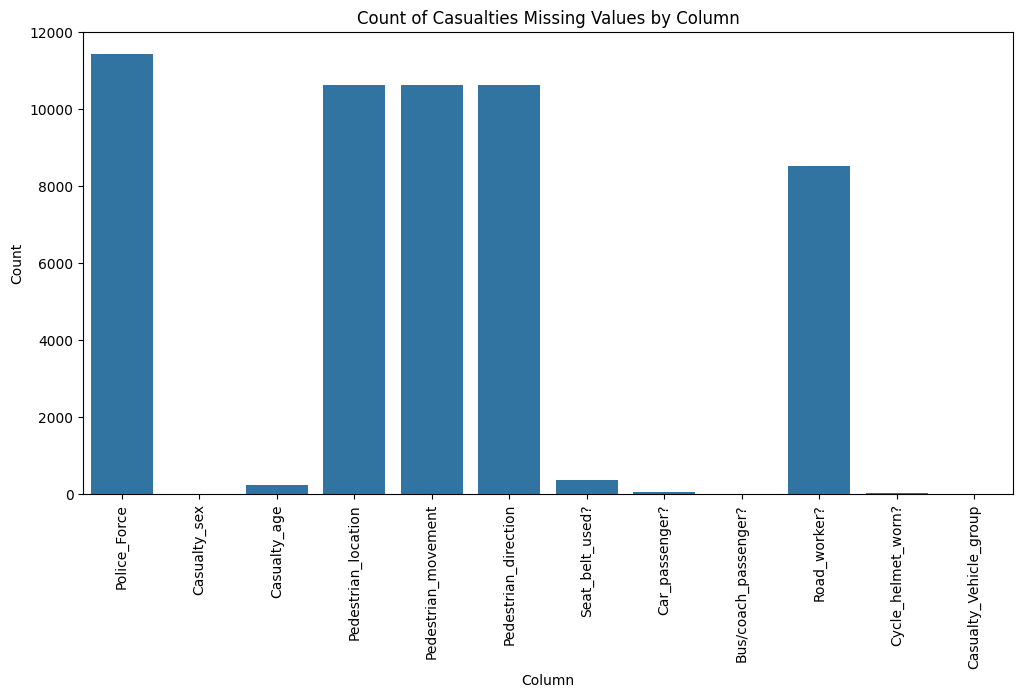

In [38]:
# Count missing values for each column
Casualties_missing_count = Casualties_df.isnull().sum()

# Filter out columns with missing values
Casualties_missing_count = Casualties_missing_count[Casualties_missing_count > 0]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x = Casualties_missing_count.index, y = Casualties_missing_count.values)
plt.title("Count of Casualties Missing Values by Column")
plt.xticks(rotation = 90)
plt.xlabel("Column")
plt.ylabel("Count")
plt.show()

In [39]:
Casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11433 entries, 0 to 11432
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Collision_Reference_No.  11433 non-null  int64  
 1   Police_Force             0 non-null      float64
 2   Vehicle_reference_no     11433 non-null  int64  
 3   Casualty_reference_no.   11433 non-null  int64  
 4   Casualty_type            11433 non-null  object 
 5   Casualty_sex             11421 non-null  object 
 6   Casualty_age             11181 non-null  float64
 7   Casualty_severity        11433 non-null  object 
 8   Pedestrian_location      802 non-null    object 
 9   Pedestrian_movement      802 non-null    object 
 10  Pedestrian_direction     801 non-null    object 
 11  Seat_belt_used?          11070 non-null  object 
 12  Car_passenger?           11380 non-null  object 
 13  Bus/coach_passenger?     11431 non-null  object 
 14  Road_worker?          

In [40]:
Casualties_df.drop(columns = ["Police_Force", "Vehicle_reference_no", "Casualty_sex", "Casualty_reference_no.", "Car_passenger?", "Bus/coach_passenger?", \
                              "Cycle_helmet_worn?", "Road_worker?", "Pedestrian_location", "Pedestrian_movement", "Pedestrian_direction", "Seat_belt_used?"], inplace = True)

In [41]:
Casualties_df.duplicated().sum()

89

In [42]:
Casualties_df.drop_duplicates(inplace = True)

In [43]:
Casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11344 entries, 0 to 11432
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Collision_Reference_No.  11344 non-null  int64  
 1   Casualty_type            11344 non-null  object 
 2   Casualty_age             11105 non-null  float64
 3   Casualty_severity        11344 non-null  object 
 4   Casualty_Vehicle_group   11335 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 531.8+ KB


In [44]:
Casualties_df["Casualty_age"].fillna(Casualties_df["Casualty_age"].median(), inplace = True)

In [45]:
Casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11344 entries, 0 to 11432
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Collision_Reference_No.  11344 non-null  int64  
 1   Casualty_type            11344 non-null  object 
 2   Casualty_age             11344 non-null  float64
 3   Casualty_severity        11344 non-null  object 
 4   Casualty_Vehicle_group   11335 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 531.8+ KB


In [46]:
Casualties_df.dropna(inplace = True)
Casualties_df

,Collision_Reference_No.,Casualty_type,Casualty_age,Casualty_severity,Casualty_Vehicle_group
0,1011395,Driver or rider,28.0,Fatal,Car
1,1012210,Driver or rider,68.0,Slight,Car
2,1017655,Driver or rider,54.0,Slight,Car
3,1021983,Driver or rider,32.0,Slight,Pedal Cycle
4,1013541,Driver or rider,38.0,Slight,Car
...,...,...,...,...,...
11428,1427577,Driver or rider,38.0,Serious,Motorcycle
11429,1427577,Vehicle or pillion passenger,8.0,Slight,Car
11430,1427577,Vehicle or pillion passenger,5.0,Slight,Car
11431,1443956,Driver or rider,68.0,Slight,Car


In [47]:
Merged_df = pd.merge(Merge1_df, Casualties_df, on = "Collision_Reference_No.", how = "inner")
Merged_df

,Collision_Reference_No.,Severity,No._Vehicles,No._Casualties,Date,Day,Time,Local_Authority_(assigned_by_police),Speed_Limit,Lighting_Conditions,Weather,Road_Conditions,Vehicle_first_point_of_impact,Driver_Sex,Driver_Age,Vehicle_type_group,Casualty_type,Casualty_age,Casualty_severity,Casualty_Vehicle_group
0,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23.0,Motorcycle,Driver or rider,23.0,Fatal,Motorcycle
1,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23.0,Motorcycle,Driver or rider,40.0,Slight,Car
2,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23.0,Motorcycle,Driver or rider,29.0,Slight,Car
3,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23.0,Motorcycle,Vehicle or pillion passenger,38.0,Slight,Car
4,1168232,Fatal,3,4,16-Apr-2022,Saturday,16:18,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Offside,Female,40.0,Car,Driver or rider,23.0,Fatal,Motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,1306563,Serious,2,3,14-Mar-2023,Tuesday,12:50,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27.0,LGV,Vehicle or pillion passenger,17.0,Slight,LGV
22031,1306563,Serious,2,3,14-Mar-2023,Tuesday,12:50,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27.0,LGV,Vehicle or pillion passenger,47.0,Serious,LGV
22032,1306563,Serious,2,3,14-Mar-2023,Tuesday,12:50,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39.0,LGV,Driver or rider,27.0,Slight,LGV
22033,1306563,Serious,2,3,14-Mar-2023,Tuesday,12:50,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39.0,LGV,Vehicle or pillion passenger,17.0,Slight,LGV


In [48]:
Merged_df.duplicated().sum()

0

In [49]:
Merged_df.isna().sum()

Collision_Reference_No.                 0
Severity                                0
No._Vehicles                            0
No._Casualties                          0
Date                                    0
Day                                     0
Time                                    0
Local_Authority_(assigned_by_police)    0
Speed_Limit                             0
Lighting_Conditions                     0
Weather                                 0
Road_Conditions                         0
Vehicle_first_point_of_impact           0
Driver_Sex                              0
Driver_Age                              0
Vehicle_type_group                      0
Casualty_type                           0
Casualty_age                            0
Casualty_severity                       0
Casualty_Vehicle_group                  0
dtype: int64

In [50]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22035 entries, 0 to 22034
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Collision_Reference_No.               22035 non-null  int64  
 1   Severity                              22035 non-null  object 
 2   No._Vehicles                          22035 non-null  int64  
 3   No._Casualties                        22035 non-null  int64  
 4   Date                                  22035 non-null  object 
 5   Day                                   22035 non-null  object 
 6   Time                                  22035 non-null  object 
 7   Local_Authority_(assigned_by_police)  22035 non-null  object 
 8   Speed_Limit                           22035 non-null  int64  
 9   Lighting_Conditions                   22035 non-null  object 
 10  Weather                               22035 non-null  object 
 11  Road_Conditions

Converting the columns to their approaprite datatypes

In [51]:
# Conversion of "Date" and "Time" columns to datetime
Merged_df["Date"] = pd.to_datetime(Merged_df["Date"], format = "%d-%b-%Y")
Merged_df["Time"] = pd.to_datetime(Merged_df["Time"], format = "%H:%M").dt.time


# Conversion of "Driver_Age" and "Casualty_age" columns to integers
Merged_df["Driver_Age"] = Merged_df["Driver_Age"].astype(int)
Merged_df["Casualty_age"] = Merged_df["Casualty_age"].astype(int)

In [52]:
Categorical_columns = ["Severity", "Day", "Local_Authority_(assigned_by_police)", "Lighting_Conditions", "Weather", \
                       "Road_Conditions", "Vehicle_first_point_of_impact", "Driver_Sex", "Vehicle_type_group", "Casualty_type", "Casualty_severity", \
                       "Casualty_Vehicle_group"]

for column in Categorical_columns:
    Merged_df[column] = Merged_df[column].astype('category')

In [53]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22035 entries, 0 to 22034
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Collision_Reference_No.               22035 non-null  int64         
 1   Severity                              22035 non-null  category      
 2   No._Vehicles                          22035 non-null  int64         
 3   No._Casualties                        22035 non-null  int64         
 4   Date                                  22035 non-null  datetime64[ns]
 5   Day                                   22035 non-null  category      
 6   Time                                  22035 non-null  object        
 7   Local_Authority_(assigned_by_police)  22035 non-null  category      
 8   Speed_Limit                           22035 non-null  int64         
 9   Lighting_Conditions                   22035 non-null  category      
 10

In [54]:
Merged_df

,Collision_Reference_No.,Severity,No._Vehicles,No._Casualties,Date,Day,Time,Local_Authority_(assigned_by_police),Speed_Limit,Lighting_Conditions,Weather,Road_Conditions,Vehicle_first_point_of_impact,Driver_Sex,Driver_Age,Vehicle_type_group,Casualty_type,Casualty_age,Casualty_severity,Casualty_Vehicle_group
0,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,23,Fatal,Motorcycle
1,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,40,Slight,Car
2,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,29,Slight,Car
3,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Vehicle or pillion passenger,38,Slight,Car
4,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Offside,Female,40,Car,Driver or rider,23,Fatal,Motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27,LGV,Vehicle or pillion passenger,17,Slight,LGV
22031,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27,LGV,Vehicle or pillion passenger,47,Serious,LGV
22032,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39,LGV,Driver or rider,27,Slight,LGV
22033,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39,LGV,Vehicle or pillion passenger,17,Slight,LGV


In [55]:
# prompt: use date, day and time column to do feature engineering, also form morning, afternoon and night

# Extract features from 'Date' column
Merged_df['Year'] = Merged_df['Date'].dt.year
Merged_df['Month'] = Merged_df['Date'].dt.strftime('%B')  # Full month name

# Extract features from 'Time' column
Merged_df["Hour"] = [t.hour for t in Merged_df["Time"]]

# Create 'Time_of_Day' category
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

Merged_df['Time_of_Day'] = Merged_df['Hour'].apply(time_of_day)

# Now you have new features: 'Year', 'Month', 'Hour', and 'Time_of_Day'
# You can drop the original 'Date' and 'Time' columns if you don't need them anymore


In [56]:
Merged_df

,Collision_Reference_No.,Severity,No._Vehicles,No._Casualties,Date,Day,Time,Local_Authority_(assigned_by_police),Speed_Limit,Lighting_Conditions,Weather,Road_Conditions,Vehicle_first_point_of_impact,Driver_Sex,Driver_Age,Vehicle_type_group,Casualty_type,Casualty_age,Casualty_severity,Casualty_Vehicle_group,Year,Month,Hour,Time_of_Day
0,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,23,Fatal,Motorcycle,2022,April,16,Afternoon
1,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,40,Slight,Car,2022,April,16,Afternoon
2,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,29,Slight,Car,2022,April,16,Afternoon
3,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Vehicle or pillion passenger,38,Slight,Car,2022,April,16,Afternoon
4,1168232,Fatal,3,4,2022-04-16,Saturday,16:18:00,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Offside,Female,40,Car,Driver or rider,23,Fatal,Motorcycle,2022,April,16,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27,LGV,Vehicle or pillion passenger,17,Slight,LGV,2023,March,12,Afternoon
22031,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27,LGV,Vehicle or pillion passenger,47,Serious,LGV,2023,March,12,Afternoon
22032,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39,LGV,Driver or rider,27,Slight,LGV,2023,March,12,Afternoon
22033,1306563,Serious,2,3,2023-03-14,Tuesday,12:50:00,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39,LGV,Vehicle or pillion passenger,17,Slight,LGV,2023,March,12,Afternoon


In [57]:
# Drop the original "Date" and "Time" columns
Merged_df.drop(["Date", "Time", "Collision_Reference_No."], axis = 1, inplace = True)

# Convert new features to appropriate data types
Merged_df["Year"] = Merged_df["Year"].astype("category")
Merged_df["Month"] = Merged_df["Month"].astype("category")
Merged_df["Hour"] = Merged_df["Hour"].astype("category")
Merged_df["Time_of_Day"] = Merged_df["Time_of_Day"].astype("category")

### **Standardise the Columns Names**

In [58]:
Merged_df.rename(columns = {
    "No._Vehicles" : "Number_of_Vehicles",
    "No._Casualties" : "Number_of_Casualties",
    "Local_Authority_(assigned_by_police)": "Local_Authority",
    "Speed_limit": "Speed_Limit",
    "Vehicle_type_group": "Vehicle_Type_Group",
    "Casualty_type": "Casualty_Type",
    "Casualty_age": "Casualty_Age",
    "Casualty_severity": "Casualty_Severity",
    "Casualty_Vehicle_group": "Casualty_Vehicle_Group"
}, inplace = True)

In [59]:
Merged_df

,Severity,Number_of_Vehicles,Number_of_Casualties,Day,Local_Authority,Speed_Limit,Lighting_Conditions,Weather,Road_Conditions,Vehicle_first_point_of_impact,Driver_Sex,Driver_Age,Vehicle_Type_Group,Casualty_Type,Casualty_Age,Casualty_Severity,Casualty_Vehicle_Group,Year,Month,Hour,Time_of_Day
0,Fatal,3,4,Saturday,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,23,Fatal,Motorcycle,2022,April,16,Afternoon
1,Fatal,3,4,Saturday,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,40,Slight,Car,2022,April,16,Afternoon
2,Fatal,3,4,Saturday,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Driver or rider,29,Slight,Car,2022,April,16,Afternoon
3,Fatal,3,4,Saturday,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Nearside,Male,23,Motorcycle,Vehicle or pillion passenger,38,Slight,Car,2022,April,16,Afternoon
4,Fatal,3,4,Saturday,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Offside,Female,40,Car,Driver or rider,23,Fatal,Motorcycle,2022,April,16,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,Serious,2,3,Tuesday,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27,LGV,Vehicle or pillion passenger,17,Slight,LGV,2023,March,12,Afternoon
22031,Serious,2,3,Tuesday,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Back,Male,27,LGV,Vehicle or pillion passenger,47,Serious,LGV,2023,March,12,Afternoon
22032,Serious,2,3,Tuesday,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39,LGV,Driver or rider,27,Slight,LGV,2023,March,12,Afternoon
22033,Serious,2,3,Tuesday,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Front,Male,39,LGV,Vehicle or pillion passenger,17,Slight,LGV,2023,March,12,Afternoon


In [60]:
Merged_df.columns

Index(['Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day',
       'Local_Authority', 'Speed_Limit', 'Lighting_Conditions', 'Weather',
       'Road_Conditions', 'Vehicle_first_point_of_impact', 'Driver_Sex',
       'Driver_Age', 'Vehicle_Type_Group', 'Casualty_Type', 'Casualty_Age',
       'Casualty_Severity', 'Casualty_Vehicle_Group', 'Year', 'Month', 'Hour',
       'Time_of_Day'],
      dtype='object')

In [61]:
# Reorder columns
Merged_df = Merged_df[["Number_of_Vehicles", "Number_of_Casualties", "Severity", "Hour", "Time_of_Day",
       "Day", "Month", "Year", "Local_Authority", "Speed_Limit", "Lighting_Conditions",
       "Weather", "Road_Conditions", "Driver_Sex", "Driver_Age", "Vehicle_Type_Group",
       "Casualty_Type", "Casualty_Age", "Casualty_Severity", "Casualty_Vehicle_Group"]]

In [62]:
Merged_df

,Number_of_Vehicles,Number_of_Casualties,Severity,Hour,Time_of_Day,Day,Month,Year,Local_Authority,Speed_Limit,Lighting_Conditions,Weather,Road_Conditions,Driver_Sex,Driver_Age,Vehicle_Type_Group,Casualty_Type,Casualty_Age,Casualty_Severity,Casualty_Vehicle_Group
0,3,4,Fatal,16,Afternoon,Saturday,April,2022,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Male,23,Motorcycle,Driver or rider,23,Fatal,Motorcycle
1,3,4,Fatal,16,Afternoon,Saturday,April,2022,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Male,23,Motorcycle,Driver or rider,40,Slight,Car
2,3,4,Fatal,16,Afternoon,Saturday,April,2022,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Male,23,Motorcycle,Driver or rider,29,Slight,Car
3,3,4,Fatal,16,Afternoon,Saturday,April,2022,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Male,23,Motorcycle,Vehicle or pillion passenger,38,Slight,Car
4,3,4,Fatal,16,Afternoon,Saturday,April,2022,East Cambridgeshire,60,Daylight,Fine without high winds,Dry,Female,40,Car,Driver or rider,23,Fatal,Motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,2,3,Serious,12,Afternoon,Tuesday,March,2023,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Male,27,LGV,Vehicle or pillion passenger,17,Slight,LGV
22031,2,3,Serious,12,Afternoon,Tuesday,March,2023,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Male,27,LGV,Vehicle or pillion passenger,47,Serious,LGV
22032,2,3,Serious,12,Afternoon,Tuesday,March,2023,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Male,39,LGV,Driver or rider,27,Slight,LGV
22033,2,3,Serious,12,Afternoon,Tuesday,March,2023,South Cambridgeshire,60,Daylight,Other,Wet/Damp,Male,39,LGV,Vehicle or pillion passenger,17,Slight,LGV


# **DISTRIBUTION OF EACH VARIABLES**

### **1. Distribution of Vehicles**

count    22035.000000
mean         2.266667
std          0.940527
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Number_of_Vehicles, dtype: float64


Number_of_Vehicles
2     14126
3      3298
1      2571
4      1406
5       405
6       127
7        65
10       30
9         7
Name: count, dtype: int64




Text(0, 0.5, 'Frequency')

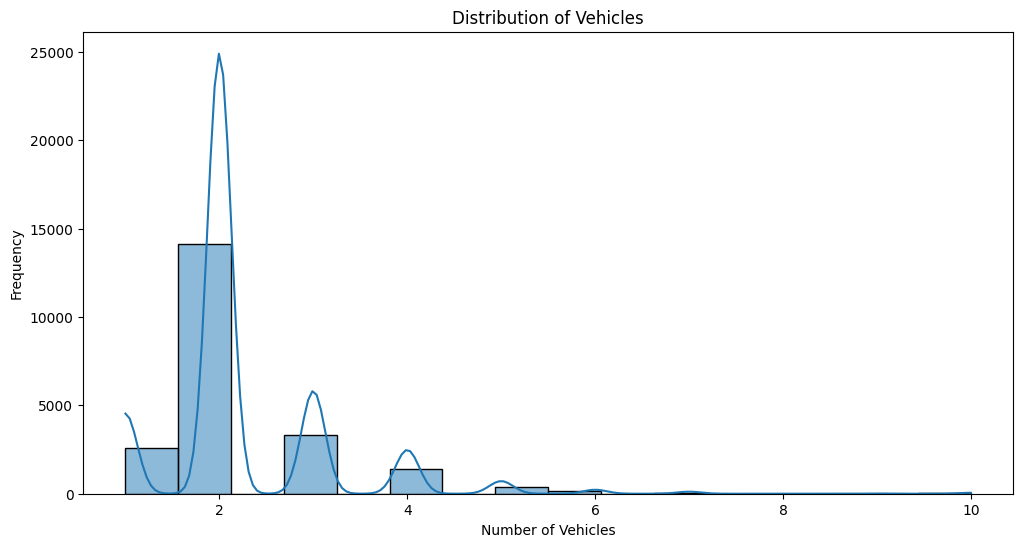

In [63]:
# Descriptive Analysis of Vehicles
Vehicles_description = Merged_df["Number_of_Vehicles"].describe()
print(Vehicles_description)

print("\n")

Number_of_Vehicles = Merged_df["Number_of_Vehicles"].value_counts()
print(Number_of_Vehicles)

print("\n")

plt.figure(figsize=(12, 6))
sns.histplot(x = "Number_of_Vehicles", data = Merged_df, kde = True)
plt.title("Distribution of Vehicles")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")

### **2. Distribution of Casualties**

count    22035.000000
mean         1.998911
std          1.707561
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: Number_of_Casualties, dtype: float64


Number_of_Casualties
1     11170
2      5684
3      2820
4      1154
5       448
6       402
7       140
20       74
8        55
9        44
11       44
Name: count, dtype: int64




Text(0, 0.5, 'Frequency')

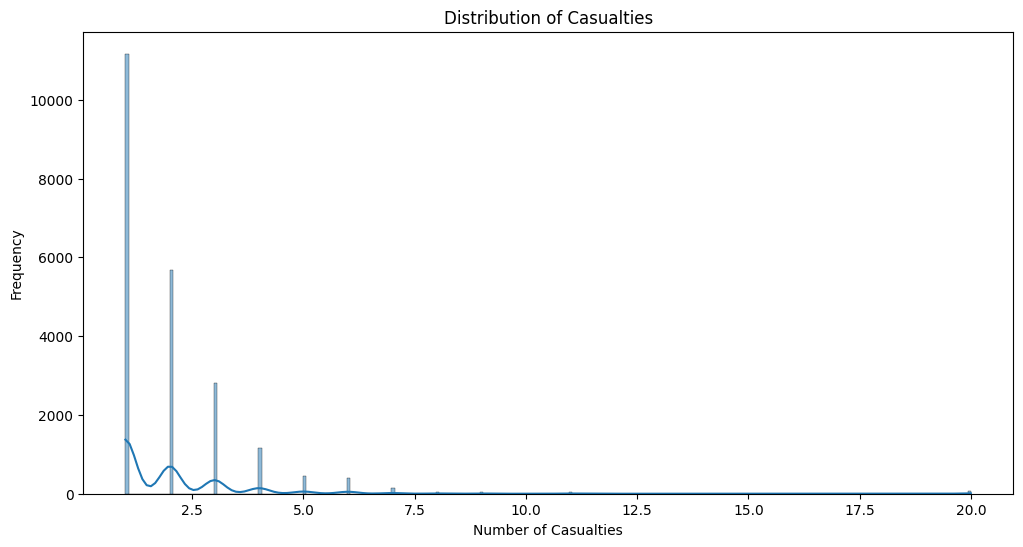

In [64]:
# Descriptive Analysis of Casualties
Casualties_description = Merged_df["Number_of_Casualties"].describe()
print(Casualties_description)

print("\n")

Number_of_Casualties = Merged_df["Number_of_Casualties"].value_counts()
print(Number_of_Casualties)

print("\n")

plt.figure(figsize=(12, 6))
sns.histplot(x = "Number_of_Casualties", data = Merged_df, kde = True)
plt.title("Distribution of Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")

### **3. Distribution of Severity**

Severity
Slight     15785
Serious     5564
Fatal        686
Name: count, dtype: int64


count      22035
unique         3
top       Slight
freq       15785
Name: Severity, dtype: object




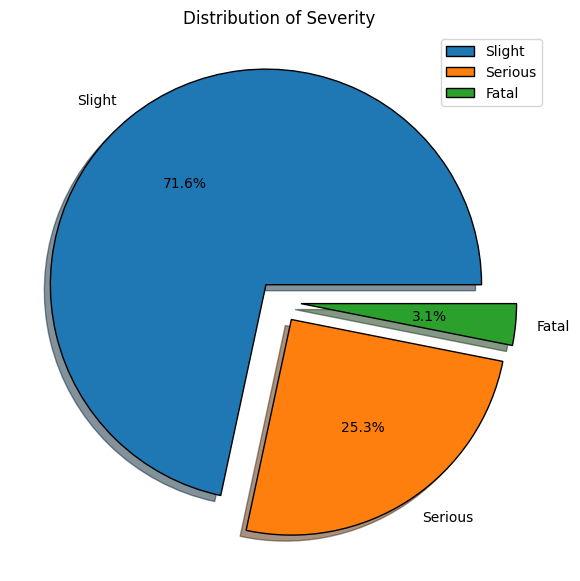

In [65]:
# Value count of Severity
Severity = Merged_df["Severity"].value_counts()
print(Severity)

print("\n")

# Descriptive Analysis of Severity
Severity_description = Merged_df["Severity"].describe()
print(Severity_description)

print("\n")

# Plot the pie chart
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(9, 7))
Merged_df['Severity'].value_counts().plot.pie(
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Severity")
plt.ylabel('')
plt.legend()

plt.show()

### **4. Distribution of Days**

count      22035
unique         7
top       Friday
freq        3958
Name: Day, dtype: object


Day
Friday       3958
Thursday     3720
Tuesday      3169
Wednesday    3076
Monday       3053
Saturday     2870
Sunday       2189
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

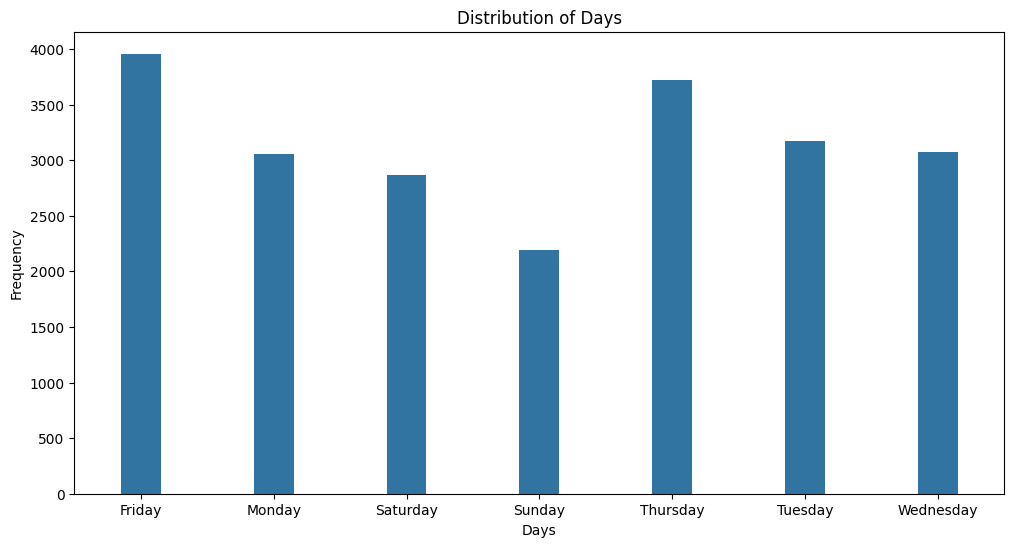

In [66]:
# Descriptive Analysis of the Days
Day_description = Merged_df["Day"].describe()
print(Day_description)

print("\n")

# Value Count
Day = Merged_df["Day"].value_counts()
print(Day)

plt.figure(figsize=(12, 6))
sns.countplot(x = "Day", data = Merged_df, width = 0.3)
plt.title("Distribution of Days")
plt.xlabel("Days")
plt.ylabel("Frequency")

### **5. Distribution of the Months**



count        22035
unique          12
top       November
freq          2240
Name: Month, dtype: object


Month
November     2240
September    2086
January      2009
June         1975
October      1902
December     1847
July         1825
August       1747
February     1707
March        1681
May          1671
April        1345
Name: count, dtype: int64




Text(0, 0.5, 'Frequency')

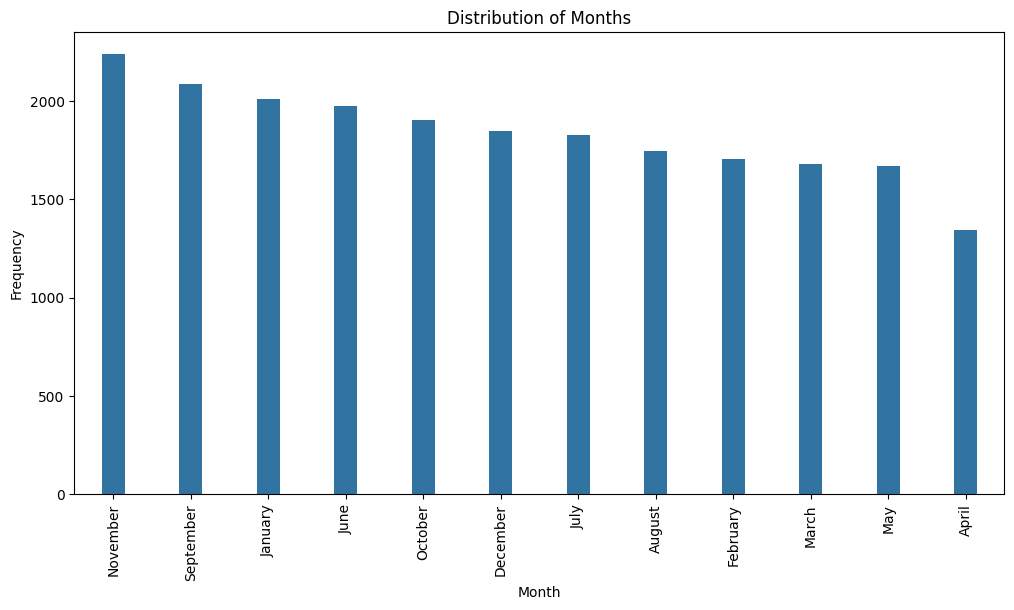

In [67]:
# Descriptive Analysis of the Months
Month_description = Merged_df["Month"].describe()
print(Month_description)

print("\n")

# Value Count
Month = Merged_df["Month"].value_counts()
print(Month)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Month", data = Merged_df, width = 0.3, order = Month.index)
plt.title("Distribution of Months")
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")

### **6. Distribution of the Years**

count     22035
unique        8
top        2017
freq       3983
Name: Year, dtype: int64


Year
2017    3983
2018    3704
2019    3215
2023    2942
2022    2819
2021    2547
2020    2317
2024     508
Name: count, dtype: int64




Text(0, 0.5, 'Frequency')

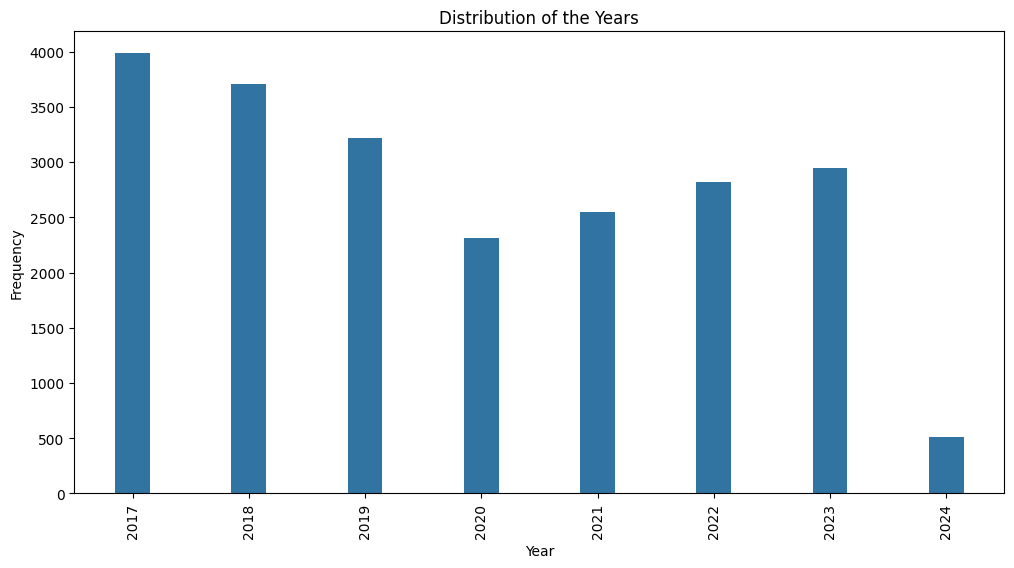

In [68]:
# Descriptive Analysis of the Years
Year_description = Merged_df["Year"].describe()
print(Year_description)

print("\n")

Year = Merged_df["Year"].value_counts()
print(Year)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Year", data = Merged_df, width = 0.3)
plt.title("Distribution of the Years")
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")

### **7. Distribution of Local Authority**

Descriptive Analysis of Local Authorities: 
count                    22035
unique                       5
top       South Cambridgeshire
freq                      6013
Name: Local_Authority, dtype: object


Local_Authority
South Cambridgeshire    6013
Huntingdonshire         5717
Cambridge City          4105
Fenland                 3369
East Cambridgeshire     2831
Name: count, dtype: int64




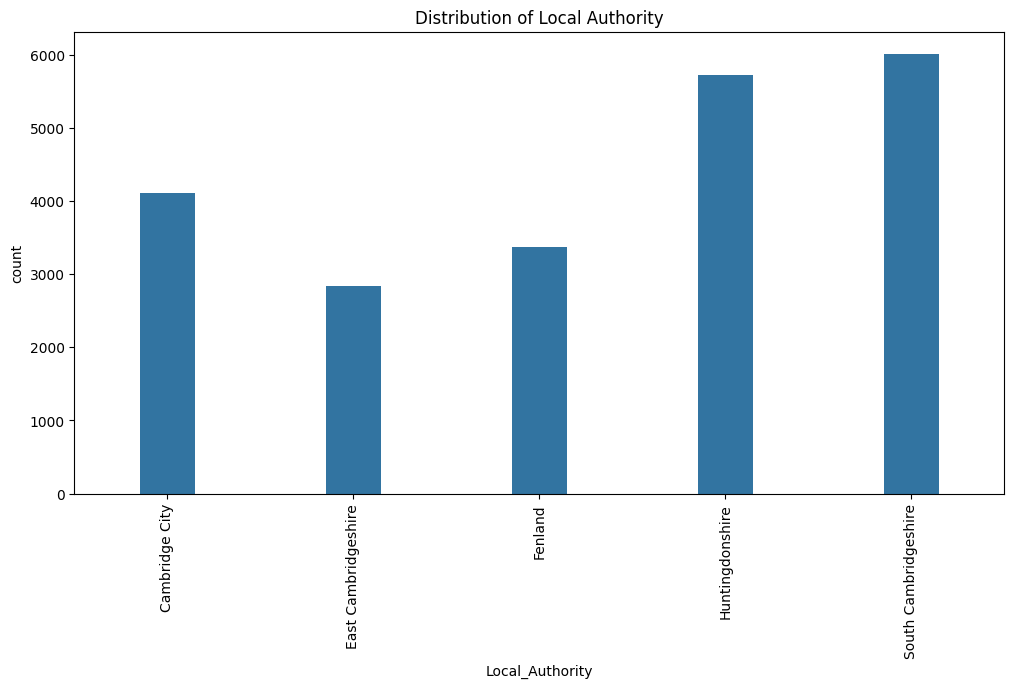

In [69]:
# Descriptive Analysis of Local Authorities
LA_description = Merged_df["Local_Authority"].describe()
print(f"Descriptive Analysis of Local Authorities: \n{LA_description}")

print("\n")

# Value Count
Local_Authority = Merged_df["Local_Authority"].value_counts()
print(Local_Authority)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Local_Authority", data = Merged_df, width = 0.3)
plt.title("Distribution of Local Authority")
plt.xticks(rotation = 90)
plt.show()

### **8. Distribution of Speed Limit**

Descriptive Analysis of Speed Limit:
count    22035.000000
mean        46.317676
std         16.289629
min         20.000000
25%         30.000000
50%         50.000000
75%         60.000000
max         70.000000
Name: Speed_Limit, dtype: float64


Speed_Limit
30    8318
60    7069
70    2862
40    1572
50    1314
20     898
25       2
Name: count, dtype: int64


Shapiro-Wilk Test for Speed Limit: 
 ShapiroResult(statistic=0.8302395415473356, pvalue=3.987223331332502e-91)




/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22035.
  res = hypotest_fun_out(*samples, **kwds)


Text(0, 0.5, 'Frequency')

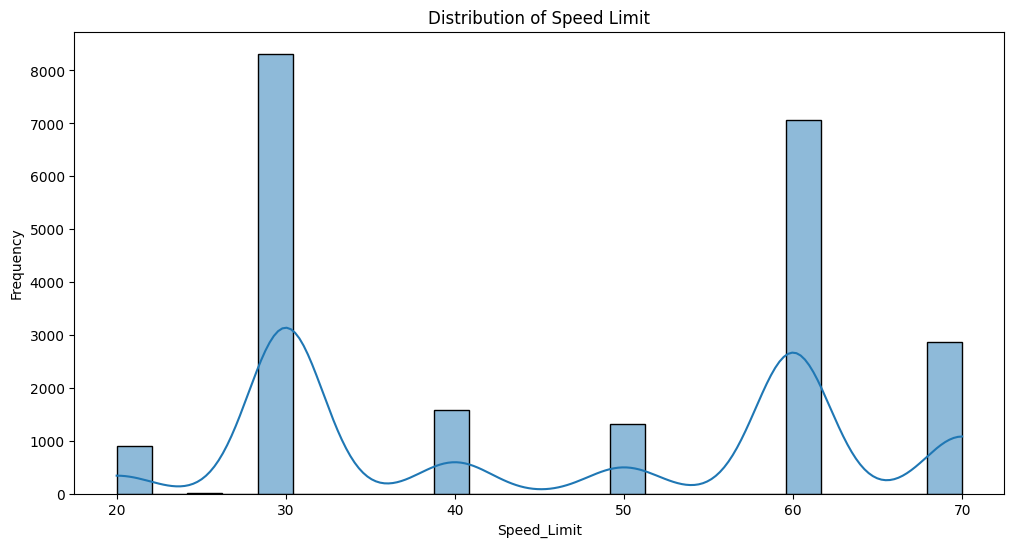

In [70]:
# Descriptive Analysis of Speed Limit
Speed_description = Merged_df["Speed_Limit"].describe()
print("Descriptive Analysis of Speed Limit:")
print(Speed_description)

print("\n")

# Value Count
Speed_Limit = Merged_df["Speed_Limit"].value_counts()
print(Speed_Limit)

print("\n")

# Shapiro-Wilk Test
shapiro_speed = shapiro(Merged_df['Speed_Limit'])
print("Shapiro-Wilk Test for Speed Limit: \n", shapiro_speed)

print("\n")

plt.figure(figsize=(12, 6))
sns.histplot(x = "Speed_Limit", data = Merged_df, kde = True)
plt.title("Distribution of Speed Limit")
plt.xlabel("Speed_Limit")
plt.ylabel("Frequency")

### **9. Distribution of Lighting Conditions**

Descriptive Analysis of Lighting Conditions:
count        22035
unique           5
top       Daylight
freq         16393
Name: Lighting_Conditions, dtype: object


Lighting_Conditions
Daylight                                     16393
Darkness: street lights present and lit       2878
Darkness: no street lighting                  2379
Darkness: street lighting unknown              313
Darkness: street lights present but unlit       72
Name: count, dtype: int64




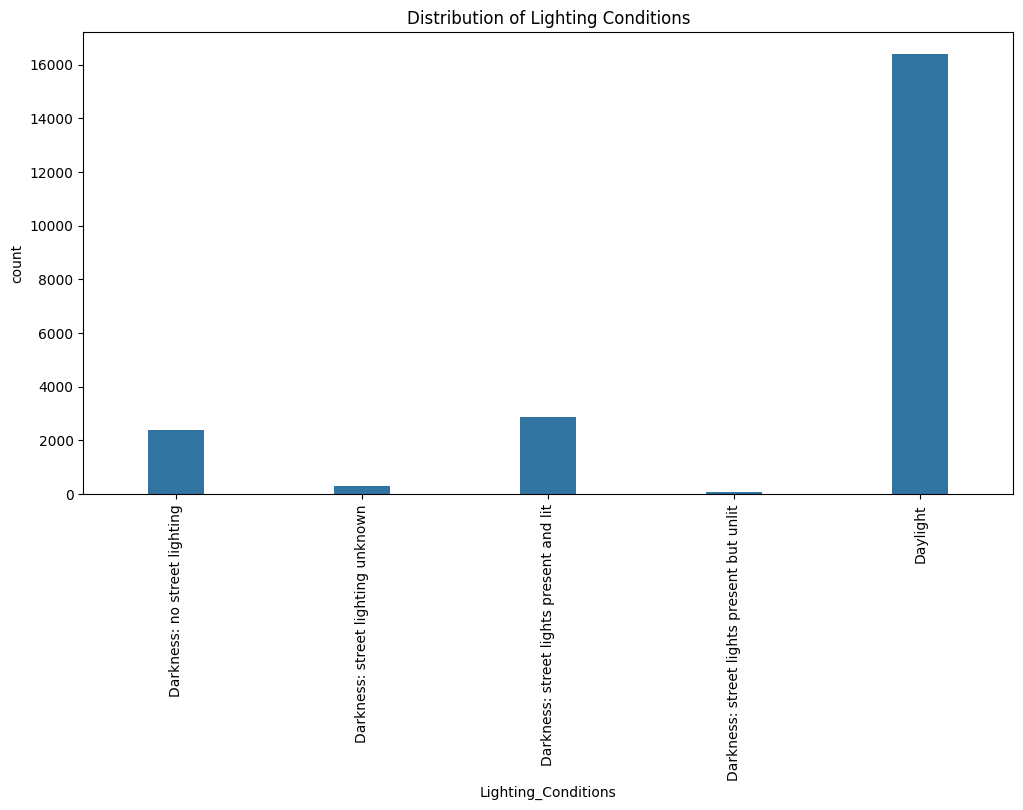

In [71]:
# Descriptive Analysis of Lighting Conditions
LC_description = Merged_df["Lighting_Conditions"].describe()
print("Descriptive Analysis of Lighting Conditions:")
print(LC_description)

print("\n")

Lighting_Conditions = Merged_df["Lighting_Conditions"].value_counts()
print(Lighting_Conditions)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Lighting_Conditions", data = Merged_df, width = 0.3)
plt.title("Distribution of Lighting Conditions")
plt.xticks(rotation = 90)
plt.show()

### **10. Distribution of Weather**

Descriptive Analysis of Weather:
count                       22035
unique                          9
top       Fine without high winds
freq                        18399
Name: Weather, dtype: object


Weather
Fine without high winds       18399
Raining without high winds     2151
Other                           571
Fine with high winds            275
Unknown                         203
Raining with high winds         190
Fog or mist - if hazard         160
Snowing without high winds       75
Snowing with high winds          11
Name: count, dtype: int64




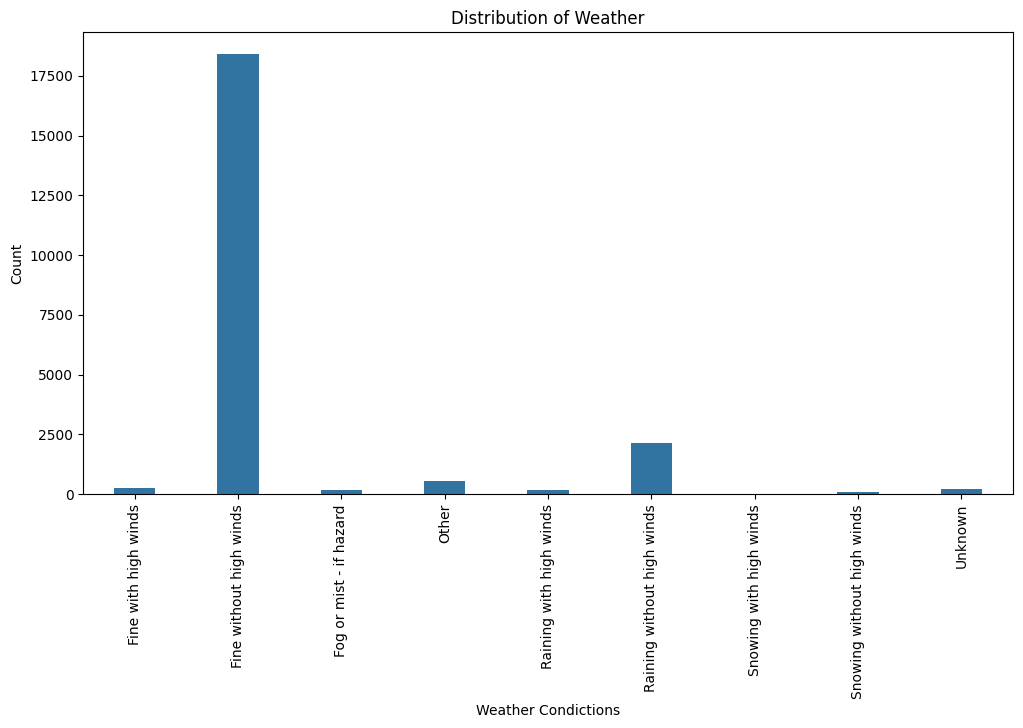

In [72]:
# Descriptive Analysis of Weather
Weather_description = Merged_df["Weather"].describe()
print("Descriptive Analysis of Weather:")
print(Weather_description)

print("\n")

# Value Count
Weather = Merged_df["Weather"].value_counts()
print(Weather)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Weather", data = Merged_df, width = 0.4)
plt.title("Distribution of Weather")
plt.xticks(rotation = 90)
plt.xlabel("Weather Condictions")
plt.ylabel("Count")
plt.show()

### **11. Distribution of Road Conditions**

Descriptive Analysis of Road Conditions:
count     22035
unique        6
top         Dry
freq      15954
Name: Road_Conditions, dtype: object


Value Count of Road Conditions: 
Road_Conditions
Dry                                    15954
Wet/Damp                                5384
Frost/Ice                                315
Unknown                                  308
Snow                                      56
Flood (surface water over 3cm deep)       18
Name: count, dtype: int64




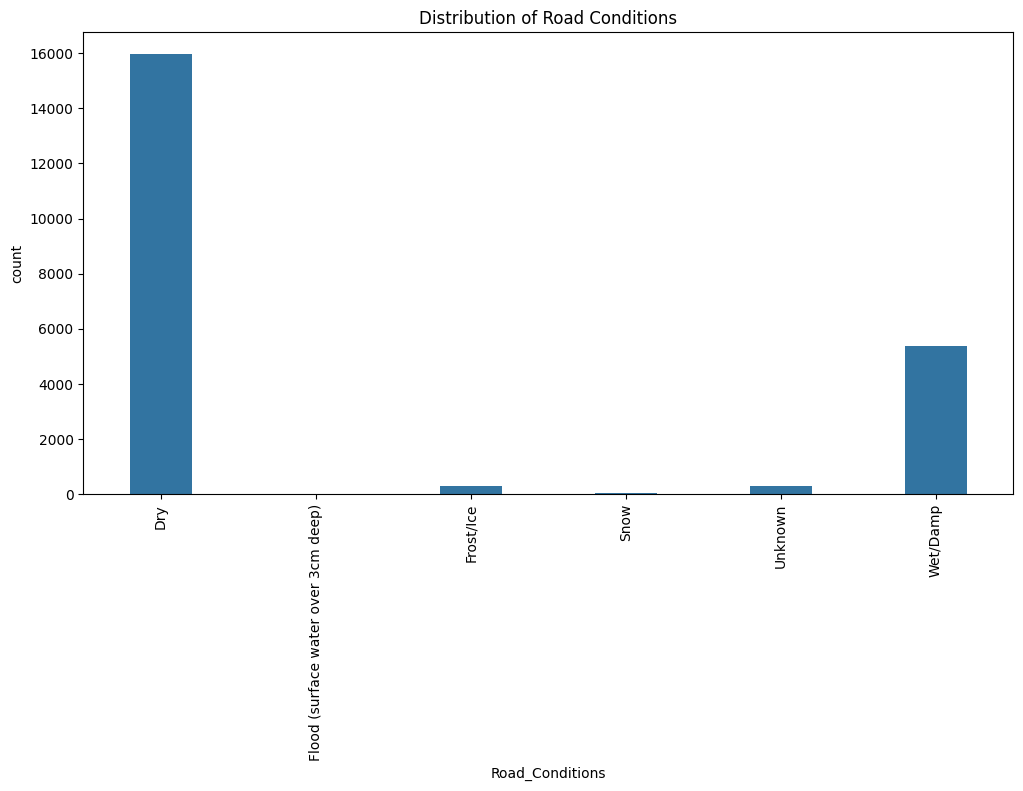

In [73]:
# Descriptive Analysis of Road Conditions
RC_description = Merged_df["Road_Conditions"].describe()
print("Descriptive Analysis of Road Conditions:")
print(RC_description)

print("\n")

Road_Conditions = Merged_df["Road_Conditions"].value_counts()
print(f"Value Count of Road Conditions: \n{Road_Conditions}")

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Road_Conditions", data = Merged_df, width = 0.4)
plt.title("Distribution of Road Conditions")
plt.xticks(rotation = 90)
plt.show()



### **12. Distribution of Driver_Sex**

Descriptive Analysis of Driver Sex: count     22035
unique        3
top        Male
freq      14314
Name: Driver_Sex, dtype: object


Value Count of Driver Sex: 
Driver_Sex
Male         14314
Female        6659
Not Known     1062
Name: count, dtype: int64




Text(0, 0.5, 'Frequency')

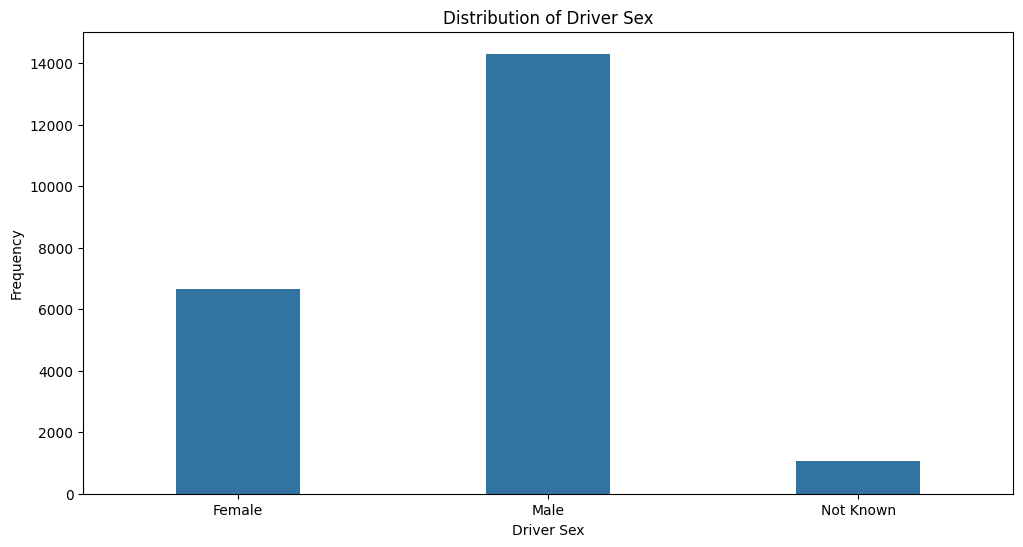

In [74]:
# Descriptive Analysis of Driver Sex
Driver_sex_Description = Merged_df["Driver_Sex"].describe()
print("Descriptive Analysis of Driver Sex:", Driver_sex_Description)

print("\n")

Driver_Sex = Merged_df["Driver_Sex"].value_counts()
print(f"Value Count of Driver Sex: \n{Driver_Sex}")

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Driver_Sex", data = Merged_df, width = 0.4)
plt.title("Distribution of Driver Sex")
plt.xlabel("Driver Sex")
plt.ylabel("Frequency")

### **13. Distribution of Driver_Age**

Descriptive Analysis of Driver Age: count    22035.000000
mean        41.558339
std         16.132774
min          3.000000
25%         29.000000
50%         39.000000
75%         52.000000
max         99.000000
Name: Driver_Age, dtype: float64




Text(0, 0.5, 'Frequency')

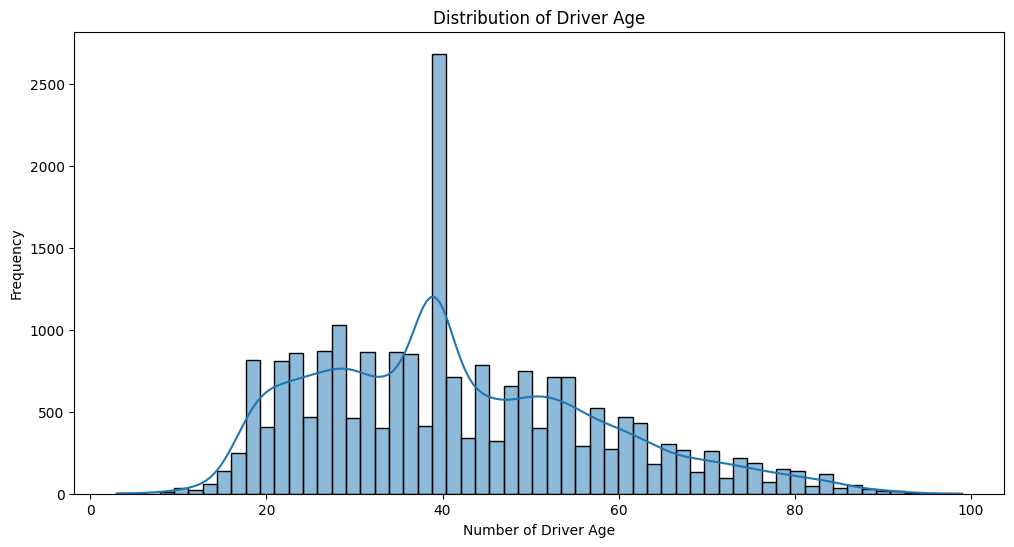

In [75]:
# Descriptive Analysis of Driver Age
Driver_Age_Description = Merged_df["Driver_Age"].describe()
print("Descriptive Analysis of Driver Age:", Driver_Age_Description)

print("\n")

plt.figure(figsize=(12, 6))
sns.histplot(x = "Driver_Age", data = Merged_df, kde = True)
plt.title("Distribution of Driver Age")
plt.xlabel("Number of Driver Age")
plt.ylabel("Frequency")

### **14. Distribution of Vehicle Type**

Descriptive Analysis of Vehicle Type: count     22035
unique        9
top         Car
freq      15613
Name: Vehicle_Type_Group, dtype: object


Vehicle_Type_Group
Car                   15613
Pedal Cycle            1987
LGV                    1231
Motorcycle             1161
Other                   921
HGV                     808
Mini-bus/Bus/Coach      212
E-scooter                78
Electric Bicycle         24
Name: count, dtype: int64




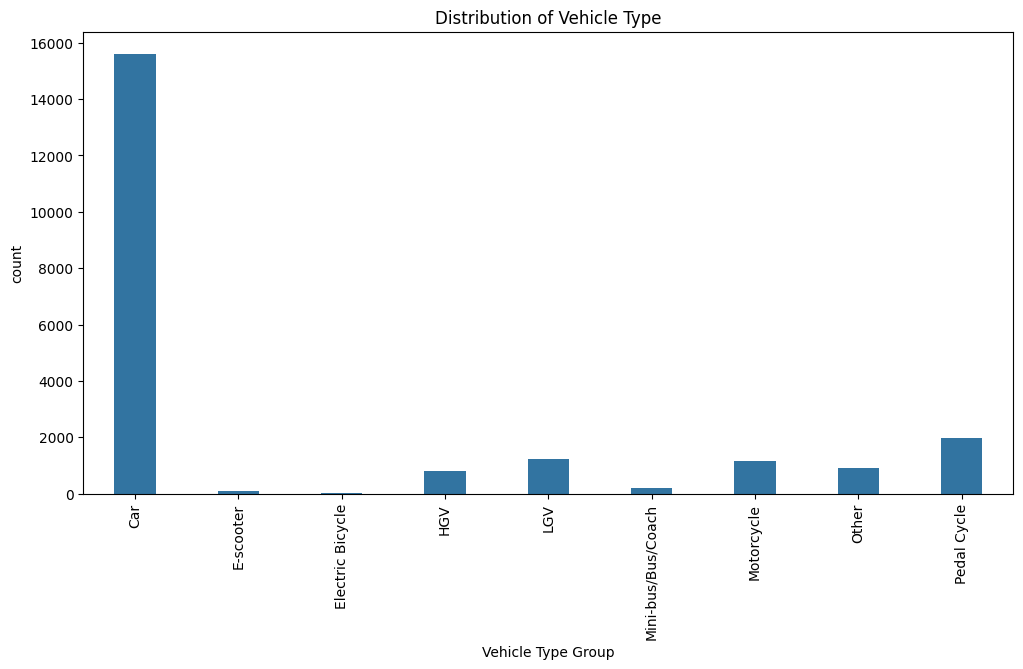

In [76]:
# Descriptive Analysis of Vehicle Type
Vehicle_Type_Description = Merged_df["Vehicle_Type_Group"].describe()
print("Descriptive Analysis of Vehicle Type:", Vehicle_Type_Description)

print("\n")

Vehicle_Type = Merged_df["Vehicle_Type_Group"].value_counts()
print(Vehicle_Type)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Vehicle_Type_Group", data = Merged_df, width = 0.4)
plt.title("Distribution of Vehicle Type")
plt.xlabel("Vehicle Type Group")
plt.xticks(rotation = 90)
plt.show()

### **15. Distribution of Casualty Type**

Descriptive Analysis of Casualty Type: count               22035
unique                  3
top       Driver or rider
freq                17090
Name: Casualty_Type, dtype: object


Casualty_Type
Driver or rider                 17090
Vehicle or pillion passenger     4099
Pedestrian                        846
Name: count, dtype: int64




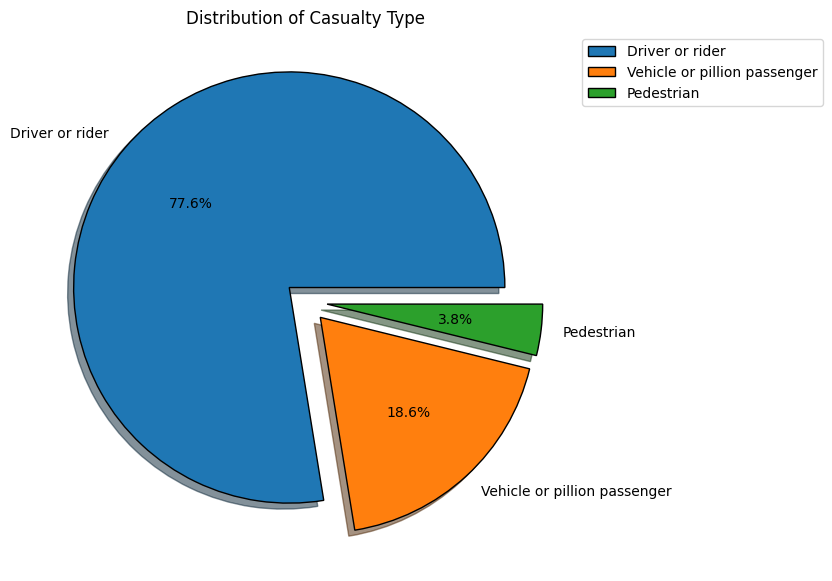

In [77]:
# Descriptive Analysis of Casualty Type
Casualty_Type_Description = Merged_df["Casualty_Type"].describe()
print("Descriptive Analysis of Casualty Type:", Casualty_Type_Description)

print("\n")

Casualty_Type = Merged_df["Casualty_Type"].value_counts()
print(Casualty_Type)

print("\n")

# Pie Chart Plot for the Casualty Type
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(10, 7))
Merged_df['Casualty_Type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Casualty Type")
plt.ylabel('')
plt.legend(loc = "upper left", bbox_to_anchor=(1, 1))
plt.show()

### **16. Distribution of Casualty Age**

Descriptive Analysis of Casualty Age: count    22035.000000
mean        38.966689
std         18.389372
min          0.000000
25%         25.000000
50%         36.000000
75%         52.000000
max        101.000000
Name: Casualty_Age, dtype: float64


Casualty_Age
36     802
25     533
29     521
18     521
21     510
      ... 
94       4
100      3
101      2
97       2
95       1
Name: count, Length: 99, dtype: int64


Text(0, 0.5, 'Count')

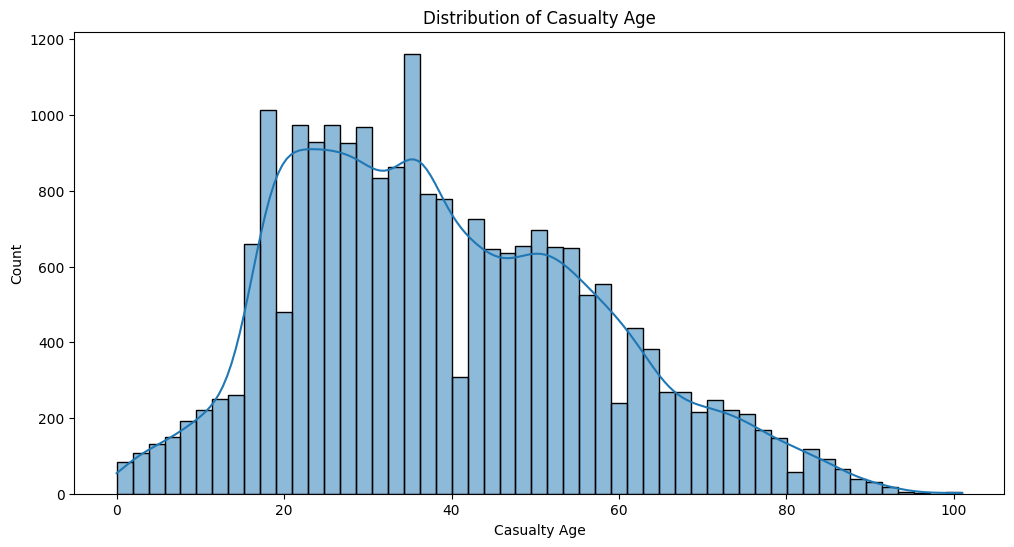

In [78]:
# Descriptive Analysis of Casualty Type
Casualty_Age_Description = Merged_df["Casualty_Age"].describe()
print("Descriptive Analysis of Casualty Age:", Casualty_Age_Description)

print("\n")

Casualty_Age = Merged_df["Casualty_Age"].value_counts()
print(Casualty_Age)

plt.figure(figsize = (12, 6))
sns.histplot(x = "Casualty_Age", data = Merged_df, kde = True)
plt.title("Distribution of Casualty Age")
plt.xlabel("Casualty Age")
plt.ylabel("Count")

### **17. Distribution of Casualty Severity**

Descriptive Analysis of Casualty Age: count      22035
unique         3
top       Slight
freq       17461
Name: Casualty_Severity, dtype: object


Casualty_Severity
Slight     17461
Serious     4198
Fatal        376
Name: count, dtype: int64




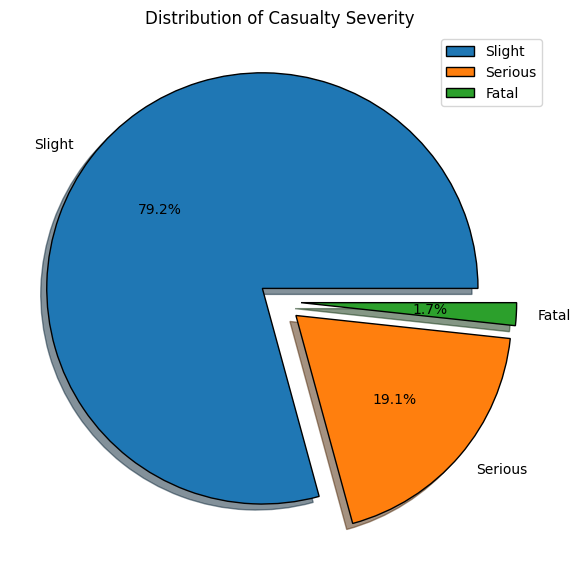

In [79]:
# Descriptive Analysis of Casualty Severity
Casualty_Severity_Description = Merged_df["Casualty_Severity"].describe()
print("Descriptive Analysis of Casualty Age:", Casualty_Severity_Description)

print("\n")

# Value Count
Casualty_Severity = Merged_df["Casualty_Severity"].value_counts()
print(Casualty_Severity)

print("\n")

# Pie Chart Plot for the Casualty Severity
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(10, 7))
Merged_df['Casualty_Severity'].value_counts().plot.pie(
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Casualty Severity")
plt.ylabel('')
plt.legend(loc = "upper right")
plt.show()

### **18. Distribution of Casualty Vehicle Group**

Descriptive Analysis of Casualty Vehicle Group: count      22035
unique         3
top       Slight
freq       17461
Name: Casualty_Severity, dtype: object


Casualty_Vehicle_Group
Car                   13634
Pedal Cycle            3725
Motorcycle             1789
LGV                     866
Pedestrian              846
Other                   512
HGV                     356
Mini-bus/Bus/Coach      174
E-scooter                96
Electric Bicycle         37
Name: count, dtype: int64




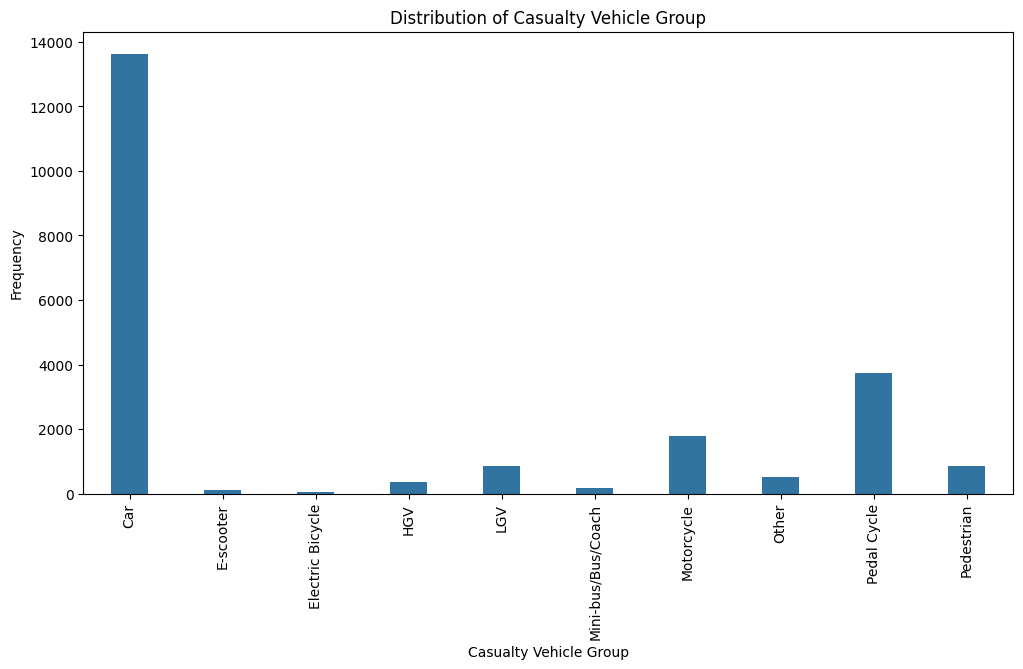

In [80]:
# Descriptive Analysis of Casualty Vehicle Group
Casualty_Vehicle_Description = Merged_df["Casualty_Severity"].describe()
print("Descriptive Analysis of Casualty Vehicle Group:", Casualty_Vehicle_Description)

print("\n")

# Value Count
Casualty_Vehicle_Group = Merged_df["Casualty_Vehicle_Group"].value_counts()
print(Casualty_Vehicle_Group)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Casualty_Vehicle_Group", data = Merged_df, width = 0.4)
plt.title("Distribution of Casualty Vehicle Group")
plt.xticks(rotation = 90)
plt.xlabel("Casualty Vehicle Group")
plt.ylabel("Frequency")
plt.show()

# **RELATIONSHIPS BETWEEN SEVERITY AND EACH VARIABLES**

This visualisations explores the relationship between accident severity and other variables.

### P-Value Significance:
* p-value < 0.05: This generally means that there is a statistically significant relationship between the variables.
* p-value < 0.01: Indicates even stronger evidence against the null hypothesis of no relationship.

### Degree of Freedom:
dof = (number of rows - 1) x (number of columns - 1)

### Cramer's V:
This measures the strength of the association between two categorical variables.

Values Near 0: Suggest a very weak or no association between the variables. Values Near 1: Indicate a strong association between the variables.

Here is a general guideline to interpret the strength of the association using Cramér's V:

* 0 to 0.10: Weak association
* 0.10 to 0.30: Moderate association
* 0.30 to 0.50: Strong association
* Above 0.50: Very strong association

### **1. Relationship between Severity and Time of the Day**


Time_of_Day  Afternoon  Morning  Night
Severity                              
Fatal              276      186    224
Serious           2338     1697   1529
Slight            7030     5045   3710


Chi-Square Statistic: 58.86963358728231
P-Value: 5.011782121001114e-12
Degree of freedom: 4


Cramer's V Value: 0.0365488857291658




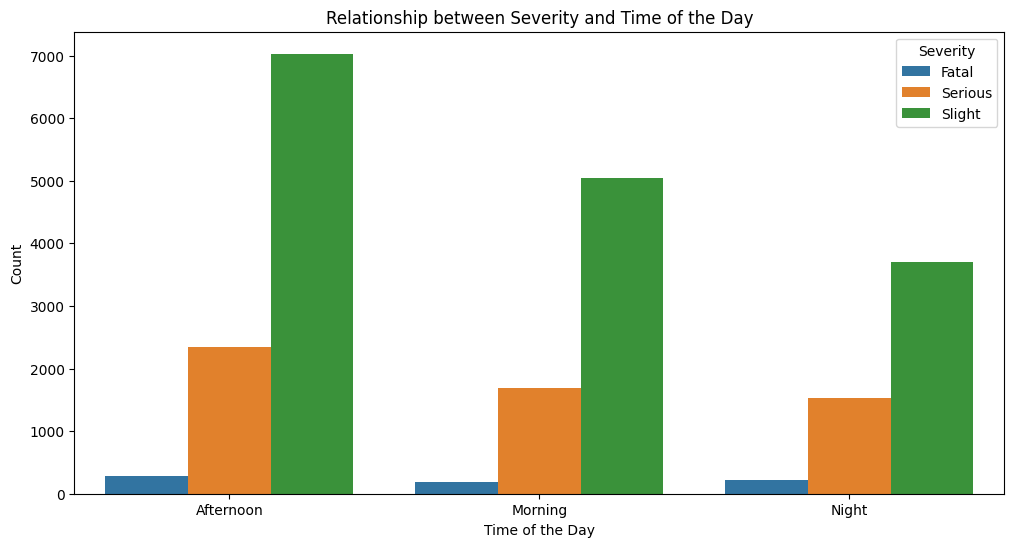

In [81]:
# Contingency Table
Severity_vs_TimeDay = pd.crosstab(Merged_df["Severity"], Merged_df["Time_of_Day"])
print(Severity_vs_TimeDay)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_TD, p_val_TD, dof_TD, _ = chi2_contingency(Severity_vs_TimeDay)
print(f"Chi-Square Statistic: {chi2_stat_TD}")
print(f"P-Value: {p_val_TD}")
print("Degree of freedom:", dof_TD)

print("\n")

# Calculate Cramer's V
n = Severity_vs_TimeDay.sum().sum()
k = Severity_vs_TimeDay.shape[1] # Number of columns
r = Severity_vs_TimeDay.shape[0] # Number of columns
cramerV_TD = np.sqrt(chi2_stat_TD / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramerV_TD)

print("\n")

# Plot the relationship between Severity and Speed Limit
plt.figure(figsize=(12, 6))
sns.countplot(x = "Time_of_Day", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Time of the Day")
plt.xlabel("Time of the Day")
plt.ylabel("Count")
plt.show()

### **2. Relationship between Severity and Month**


Month     April  August  December  February  January  July  June  March   May  \
Severity                                                                        
Fatal        29      53        73        43       60    95   100     20    37   
Serious     380     450       433       368      415   487   491    452   429   
Slight      936    1244      1341      1296     1534  1243  1384   1209  1205   

Month     November  October  September  
Severity                                
Fatal          105       35         36  
Serious        511      510        638  
Slight        1624     1357       1412  


Chi-Square Statistic: 212.8467373793855
P-Value: 3.419191071789604e-33
Degree of freedom: 22


Cramer's V Value: 0.06949634644215755




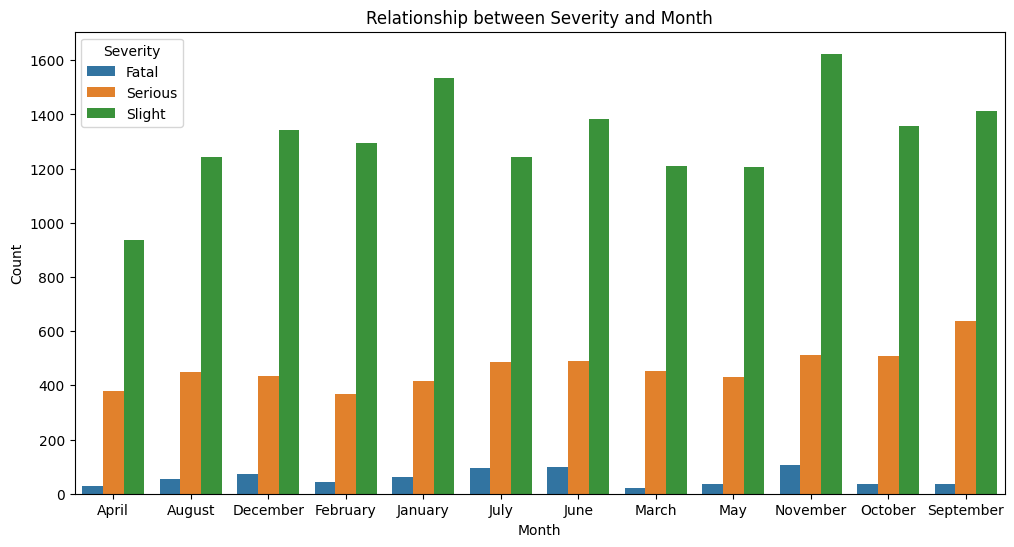

In [82]:
# Contingency Table
Severity_vs_Month = pd.crosstab(Merged_df["Severity"], Merged_df["Month"])
print(Severity_vs_Month)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_Month, p_val_Month, dof_Month, _ = chi2_contingency(Severity_vs_Month)
print(f"Chi-Square Statistic: {chi2_stat_Month}")
print(f"P-Value: {p_val_Month}")
print("Degree of freedom:", dof_Month)

print("\n")

# Calculate Cramer's V
n = Severity_vs_Month.sum().sum()
k = Severity_vs_Month.shape[1] # Number of columns
r = Severity_vs_Month.shape[0] # Number of columns
cramerV_Month = np.sqrt(chi2_stat_Month / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramerV_Month)

print("\n")

# Plot the relationship between Severity and Month
plt.figure(figsize=(12, 6))
sns.countplot(x = "Month", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### **3. Relationship between Severity and Speed Limit**



Severity     Fatal  Serious  Slight
Speed_Limit                        
20               4      251     643
25               0        0       2
30              38     1856    6424
40              29      400    1143
50              76      332     906
60             426     1989    4654
70             113      736    2013


Chi-Square Statistic: 573.5687841941764
P-Value: 4.648670398139037e-115
Degree of freedom: 12


Cramer's V Value: 0.11408307756283474




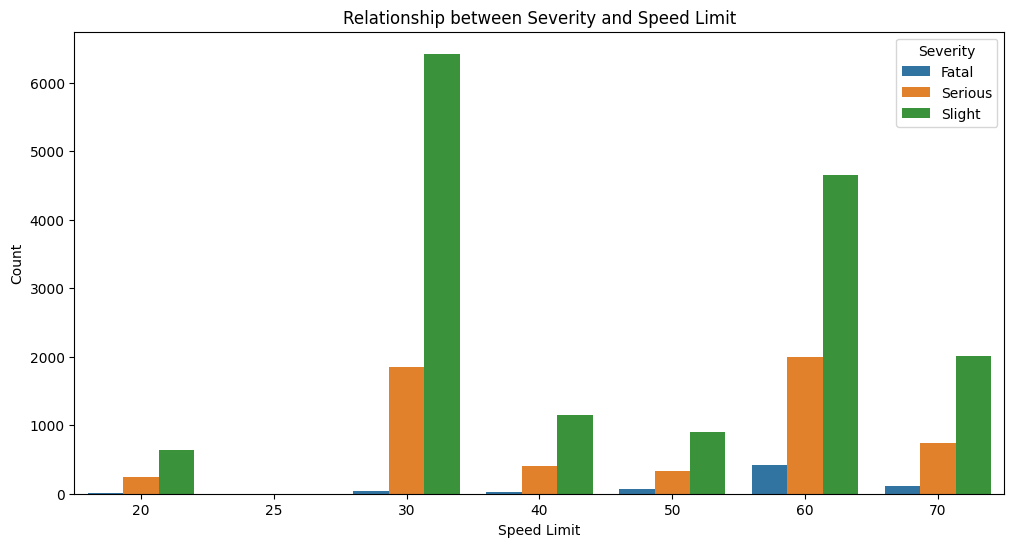

In [83]:
# Contingency Table
SpeedLimit_vs_Severity = pd.crosstab(Merged_df["Speed_Limit"], Merged_df["Severity"])
print(SpeedLimit_vs_Severity)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_SL, p_val_SL, dof_SL, _ = chi2_contingency(SpeedLimit_vs_Severity)
print(f"Chi-Square Statistic: {chi2_stat_SL}")
print(f"P-Value: {p_val_SL}")
print("Degree of freedom:", dof_SL)

print("\n")

# Calculate Cramer's V
n = SpeedLimit_vs_Severity.sum().sum()
k = SpeedLimit_vs_Severity.shape[1] # Number of columns
r = SpeedLimit_vs_Severity.shape[0] # Number of columns
cramerV_SL = np.sqrt(chi2_stat_SL / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramerV_SL)

print("\n")

# Plot the relationship between Severity and Speed Limit
plt.figure(figsize=(12, 6))
sns.countplot(x = "Speed_Limit", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.show()

# Analysis: This plot shows the distribution of accident severity across different speed limits.
# We can observe that a higher proportion of fatal accidents occur at higher speed limits.
# This suggests that speed is a significant factor in accident severity.

# p-value has a low value which means null hypothesis is rejected. There is a significant association between
# the speed limit and the severity of accidents. This means that changes in speed limits are associated with
# changes in the severity of accidents.

The P-Value is 4.648670398139037e-115 which is very small, we will reject the null hypothesis saying Severity and Speed Limit have no relationship.

The Cramer's V value of 0.114 suggests a weak association between Speed_Limit and Severity.

### **4. Relationship between Severity and Lighting Conditions**

Severity                                   Fatal  Serious  Slight
Lighting_Conditions                                              
Darkness: no street lighting                 220      728    1431
Darkness: street lighting unknown              4       89     220
Darkness: street lights present and lit       47      711    2120
Darkness: street lights present but unlit      0       18      54
Daylight                                     415     4018   11960


P-Value: 3.0652078313711966e-84
Chi-Square Statistic: 413.0217887632036
Degrees of Freedom: 8


Cramer's V Value: 0.09680882664714043




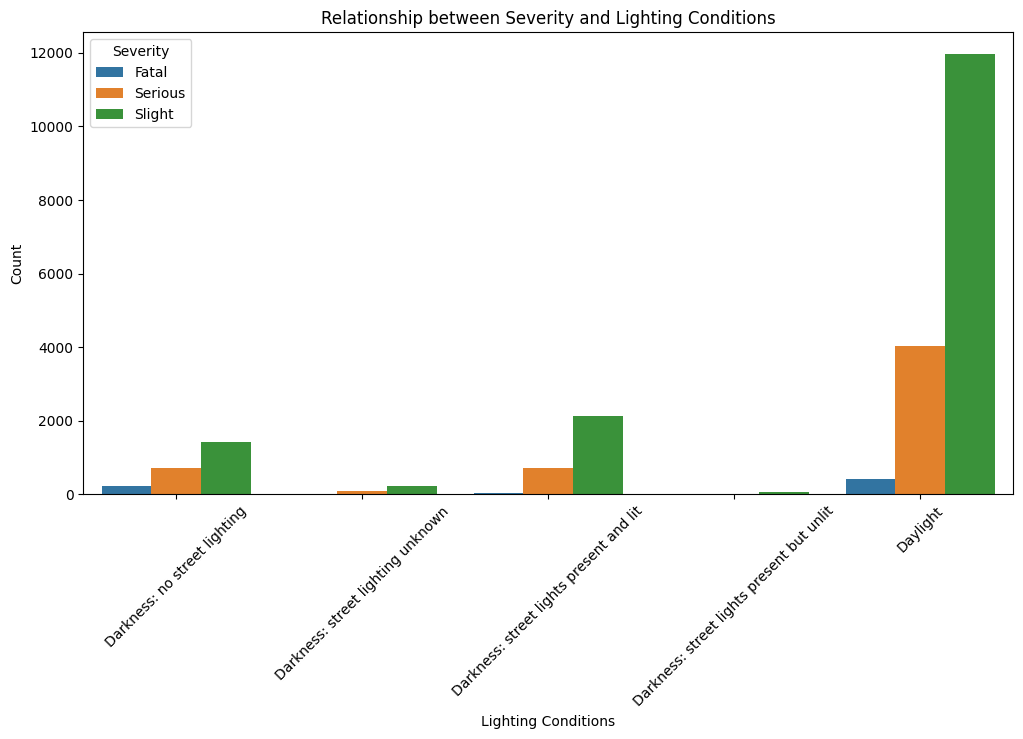

In [84]:
# Contingency table
Severity_vs_LightingConditions = pd.crosstab(Merged_df["Lighting_Conditions"], Merged_df["Severity"])
print(Severity_vs_LightingConditions)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_LC, p_val_LC, dof_LC, _ = chi2_contingency(Severity_vs_LightingConditions)
print(f"P-Value: {p_val_LC}")
print(f"Chi-Square Statistic: {chi2_stat_LC}")
print(f"Degrees of Freedom: {dof_LC}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_LightingConditions.sum().sum()  # Total number of observations
k = Severity_vs_LightingConditions.shape[1]     # Number of columns (unique values in Severity)
r = Severity_vs_LightingConditions.shape[0]     # Number of rows (unique values in Vehicle_Type_Group)
cramersV_LC = np.sqrt(chi2_stat_LC / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_LC)

print("\n")

# Plot the relationship between Severity and Lighting Conditions
plt.figure(figsize=(12, 6))
sns.countplot(x = "Lighting_Conditions", hue ="Severity", data = Merged_df)
plt.title("Relationship between Severity and Lighting Conditions")
plt.xlabel("Lighting Conditions")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

# Analysis: This visualization explores the relationship between accident severity and lighting conditions.
# It appears that accidents occurring in darkness have a higher proportion of fatal outcomes compared to daylight or well-lit conditions.
# This highlights the importance of visibility in road safety.

This visualisation explores the relationship between accident severity and lighting conditions.

From the plot above, it is deduced that the occurence of collisions in darkness have a higher proportion of fatal outcomes compared to daylight or well-lit conditions. This highlights the importance of visibility in road safety.

**The p-value** (3.0652078313711966e-84) is much smaller than 0.01, so we reject the null hypothesis with high confidence. This suggests that the relationship between Speed_Limit and Severity is statistically significant.

### Cramer's V:
**Cramer's V** value of 0.0968 indicates a weak association. This means that while there is a statistically significant relationship (as indicated by the p-value), the strength of this relationship is weak.

### **5. Relationship between Severity and Weather Conditions**

Severity                    Fatal  Serious  Slight
Weather                                           
Fine with high winds            2       89     184
Fine without high winds       592     4630   13177
Fog or mist - if hazard        17       22     121
Other                          16      168     387
Raining with high winds        15       40     135
Raining without high winds     44      557    1550
Snowing with high winds         0        0      11
Snowing without high winds      0       11      64
Unknown                         0       47     156


P-Value: 7.761663886463911e-14
Chi-Square Statistic: 98.12776281881835
Degrees of Freedom: 16


Cramer's V Value: 0.04718722343325203




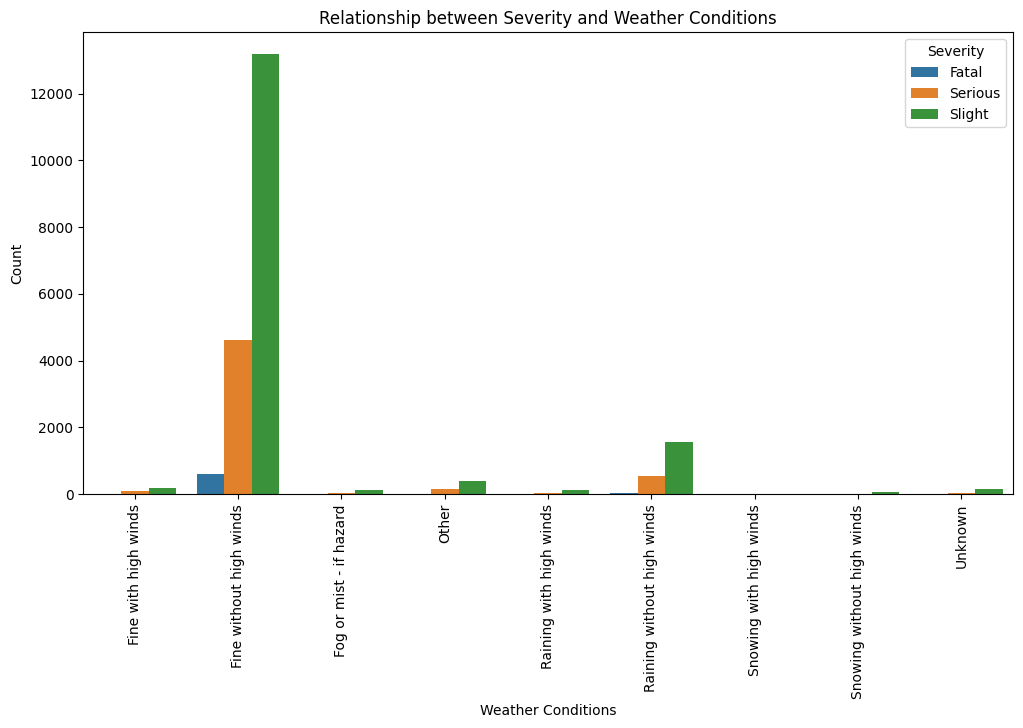

In [85]:
# Contingency Table
Severity_vs_Weather = pd.crosstab(Merged_df["Weather"], Merged_df["Severity"])
print(Severity_vs_Weather)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_Weather, p_val_Weather, dof_Weather, _ = chi2_contingency(Severity_vs_Weather)
print(f"P-Value: {p_val_Weather}")
print(f"Chi-Square Statistic: {chi2_stat_Weather}")
print(f"Degrees of Freedom: {dof_Weather}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_Weather.sum().sum()
k = Severity_vs_Weather.shape[1]
r = Severity_vs_Weather.shape[0]
cramersV_Weather = np.sqrt(chi2_stat_Weather / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_Weather)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Weather", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

# Analysis: This plot examines how weather conditions relate to accident severity.
# While fine weather without high winds seems to be associated with the majority of accidents, \
# the proportion of fatal accidents appears to be higher in adverse weather conditions such as rain, snow, or fog.

### **6. Relationship between Severity and Road Conditions**

Severity                             Fatal  Serious  Slight
Road_Conditions                                            
Dry                                    546     4109   11299
Flood (surface water over 3cm deep)      9        2       7
Frost/Ice                                7       84     224
Snow                                     0        3      53
Unknown                                  0       38     270
Wet/Damp                               124     1328    3932


P-Value: 1.7263014994579203e-39
Chi-Square Statistic: 209.44104642521594
Degrees of Freedom: 10


Cramer's V Value: 0.06893811025642937




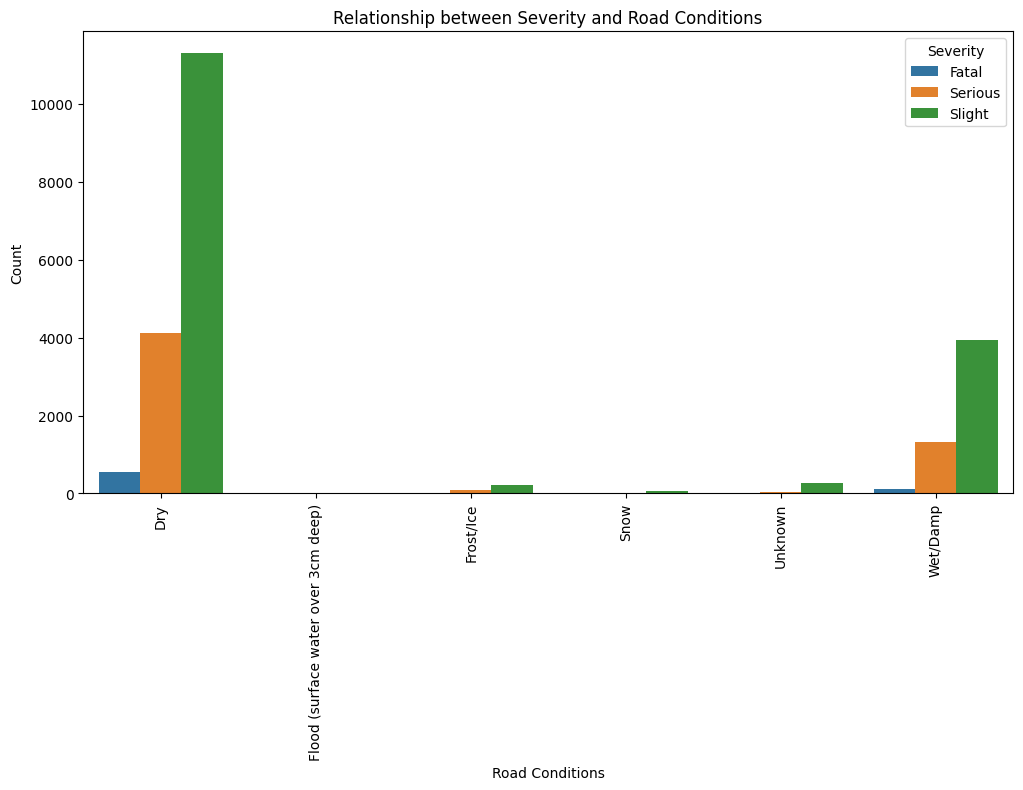

In [86]:
# Contingency Table
Severity_vs_RoadConditions = pd.crosstab(Merged_df["Road_Conditions"], Merged_df["Severity"])
print(Severity_vs_RoadConditions)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_RC, p_val_RC, dof_RC, _ = chi2_contingency(Severity_vs_RoadConditions)
print(f"P-Value: {p_val_RC}")
print(f"Chi-Square Statistic: {chi2_stat_RC}")
print(f"Degrees of Freedom: {dof_RC}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_RoadConditions.sum().sum()
k = Severity_vs_RoadConditions.shape[1]
r = Severity_vs_RoadConditions.shape[0]
cramersV_RC = np.sqrt(chi2_stat_RC / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_RC)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Road_Conditions", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Road Conditions")
plt.xlabel("Road Conditions")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### **7. Relationship between Severity and Driver Sex**

Driver_Sex  Female  Male  Not Known
Severity                           
Fatal          148   533          5
Serious       1523  3807        234
Slight        4988  9974        823


P-Value: 6.796370689712872e-23
Chi-Square Statistic: 110.1393265926411
Degrees of Freedom: 4
Cramer's V Value: 0.04999190463002337




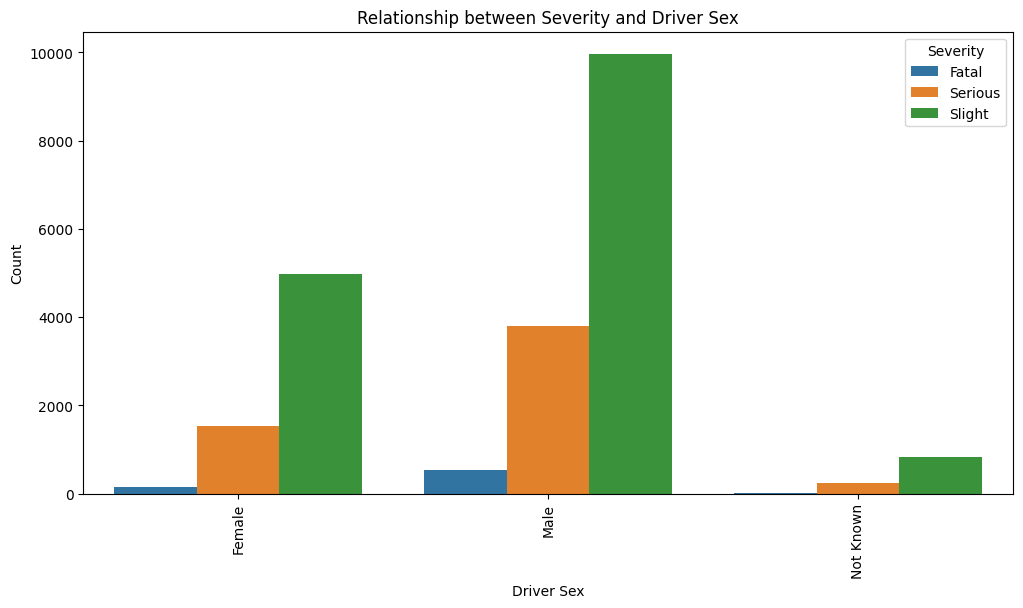

In [88]:
# Contingency Table
Severity_vs_DriverSex = pd.crosstab(Merged_df["Severity"], Merged_df["Driver_Sex"])
print(Severity_vs_DriverSex)

print("\n")

chi2_stat_DS, p_val_DS, dof_DS, _ = chi2_contingency(Severity_vs_DriverSex)
print(f"P-Value: {p_val_DS}")
print(f"Chi-Square Statistic: {chi2_stat_DS}")
print(f"Degrees of Freedom: {dof_DS}")

# Cramer's V
k = Severity_vs_DriverSex.shape[1]
r = Severity_vs_DriverSex.shape[0]
n = Severity_vs_DriverSex.sum().sum()
cramersV_DS = np.sqrt(chi2_stat_DS / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_DS)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Driver_Sex", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Driver Sex")
plt.xlabel("Driver Sex")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### **8. Relationship between Severity and Driver Age**

F-Statistic: 50.261704096611496
P-Value: 1.6644298378433374e-22
Reject the null hypothesis: There is a significant difference in driver age across severity levels.




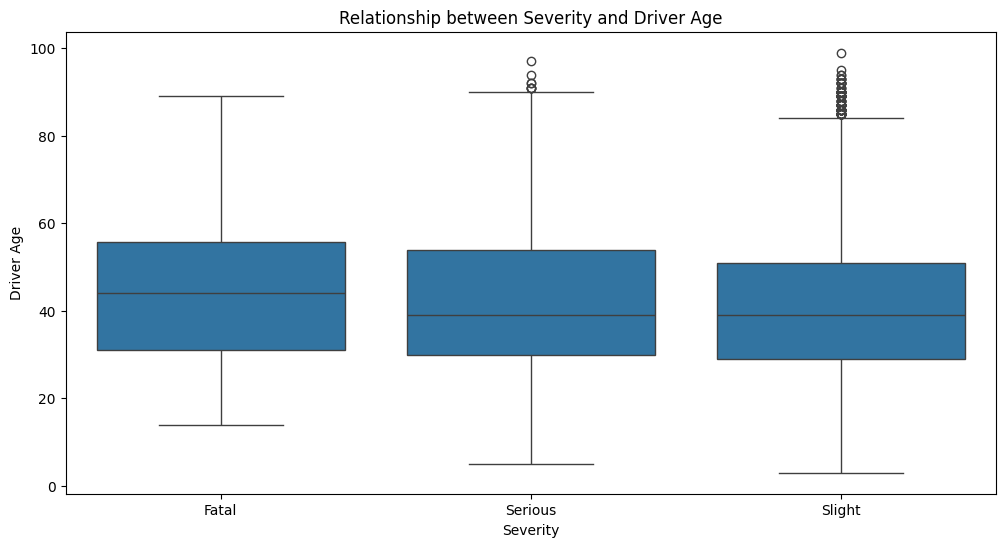

In [90]:
# ANOVA Test
f_statistic_DA, p_value_DA = stats.f_oneway(
    Merged_df[Merged_df['Severity'] == 'Fatal']['Driver_Age'],
    Merged_df[Merged_df['Severity'] == 'Serious']['Driver_Age'],
    Merged_df[Merged_df['Severity'] == 'Slight']['Driver_Age']
)

# Print results
print(f"F-Statistic: {f_statistic_DA}")
print(f"P-Value: {p_value_DA}")

Significance_level = 0.05
if p_value_DA < Significance_level:
  print("Reject the null hypothesis: There is a significant difference in driver age across severity levels.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference in driver age across severity levels.")

print("\n")

# Plot the relationship between Severity and Driver Age
plt.figure(figsize=(12, 6))
sns.boxplot(x = "Severity", y = "Driver_Age", data = Merged_df)
plt.title("Relationship between Severity and Driver Age")
plt.xlabel("Severity")
plt.ylabel("Driver Age")
plt.show()

### **9. Relationship between Severity and Vehicle Type**

Vehicle_Type_Group    Car  E-scooter  Electric Bicycle  HGV  LGV  \
Severity                                                           
Fatal                 447          0                 0   77   57   
Serious              3684         27                 8  209  333   
Slight              11482         51                16  522  841   

Vehicle_Type_Group  Mini-bus/Bus/Coach  Motorcycle  Other  Pedal Cycle  
Severity                                                                
Fatal                               43          33     12           17  
Serious                             61         496    214          532  
Slight                             108         632    695         1438  


P-Value: 1.2152437145375979e-119
Chi-Square Statistic: 610.7221949870956
Degrees of Freedom: 16


Cramer's V Value: 0.11772001980553502




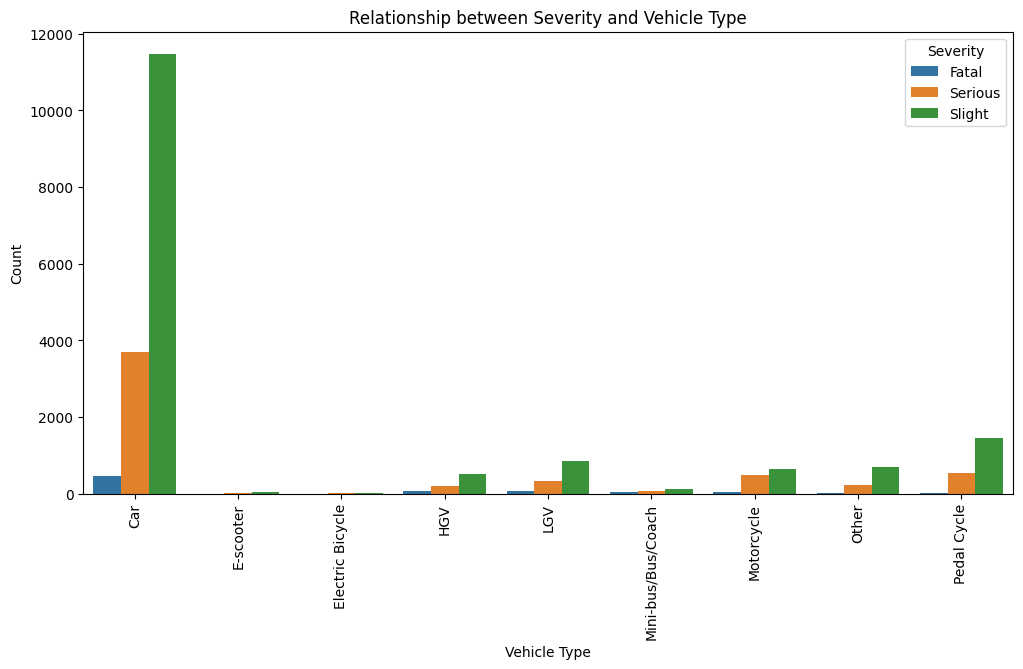

In [91]:
# Contingency Table
Severity_vs_VehicleType = pd.crosstab(Merged_df["Severity"], Merged_df["Vehicle_Type_Group"])
print(Severity_vs_VehicleType)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_VT, p_val_VT, dof_VT, _ = chi2_contingency(Severity_vs_VehicleType)
print(f"P-Value: {p_val_VT}")
print(f"Chi-Square Statistic: {chi2_stat_VT}")
print(f"Degrees of Freedom: {dof_VT}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_VehicleType.sum().sum()
k = Severity_vs_VehicleType.shape[1]
r = Severity_vs_VehicleType.shape[0]
cramersV_VT = np.sqrt(chi2_stat_VT / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_VT)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Vehicle_Type_Group", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

# Analysis: This plot explores how vehicle type relates to accident severity.

Casualty_Type  Driver or rider  Pedestrian  Vehicle or pillion passenger
Severity                                                                
Fatal                      451          35                           200
Serious                   4228         250                          1086
Slight                   12411         561                          2813


P-Value: 5.671456499516966e-16
Chi-Square Statistic: 77.57903812480109
Degrees of Freedom: 4


Cramer's V Value: 0.04195663696761186




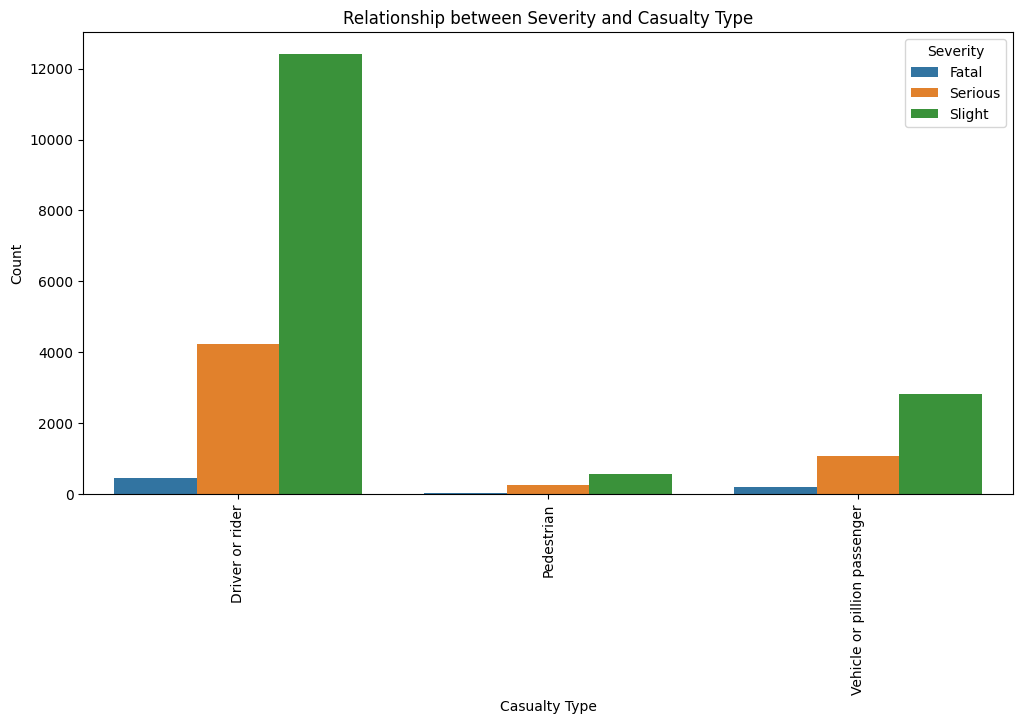

In [93]:
# prompt: what is next

# ### **10. Relationship between Severity and Casualty Type**
# Contingency Table
Severity_vs_CasualtyType = pd.crosstab(Merged_df["Severity"], Merged_df["Casualty_Type"])
print(Severity_vs_CasualtyType)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_CT, p_val_CT, dof_CT, _ = chi2_contingency(Severity_vs_CasualtyType)
print(f"P-Value: {p_val_CT}")
print(f"Chi-Square Statistic: {chi2_stat_CT}")
print(f"Degrees of Freedom: {dof_CT}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_CasualtyType.sum().sum()
k = Severity_vs_CasualtyType.shape[1]
r = Severity_vs_CasualtyType.shape[0]
cramersV_CT = np.sqrt(chi2_stat_CT / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_CT)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Casualty_Type", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Casualty Type")
plt.xlabel("Casualty Type")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


F-Statistic: 86.79773327884547
P-Value: 2.8310984567943235e-38
Reject the null hypothesis: There is a significant difference in casualty age across severity levels.




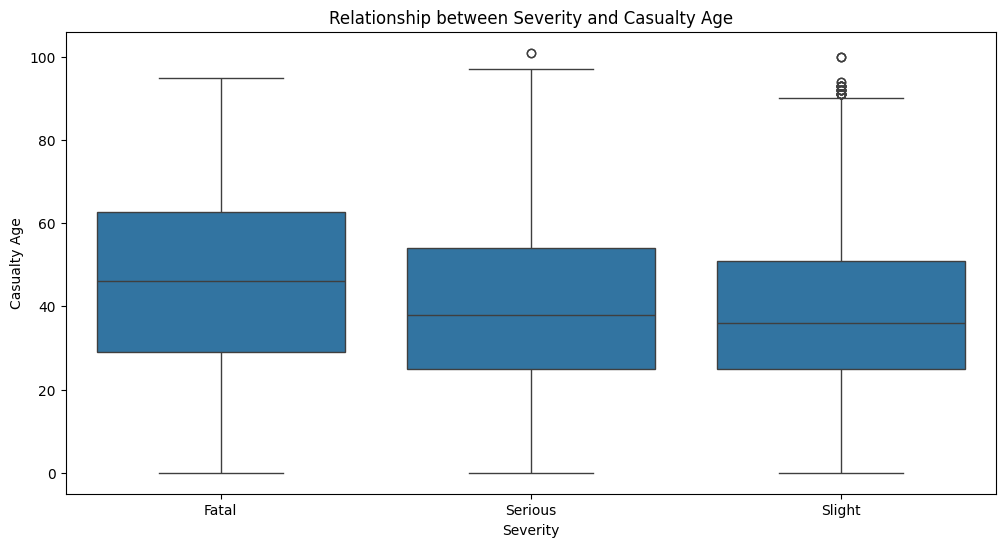

In [94]:
# prompt: what is next

# ### **11. Relationship between Severity and Casualty Age**
# ANOVA Test
f_statistic_CA, p_value_CA = stats.f_oneway(
    Merged_df[Merged_df['Severity'] == 'Fatal']['Casualty_Age'],
    Merged_df[Merged_df['Severity'] == 'Serious']['Casualty_Age'],
    Merged_df[Merged_df['Severity'] == 'Slight']['Casualty_Age']
)

# Print results
print(f"F-Statistic: {f_statistic_CA}")
print(f"P-Value: {p_value_CA}")

Significance_level = 0.05
if p_value_CA < Significance_level:
  print("Reject the null hypothesis: There is a significant difference in casualty age across severity levels.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference in casualty age across severity levels.")

print("\n")

# Plot the relationship between Severity and Casualty Age
plt.figure(figsize=(12, 6))
sns.boxplot(x = "Severity", y = "Casualty_Age", data = Merged_df)
plt.title("Relationship between Severity and Casualty Age")
plt.xlabel("Severity")
plt.ylabel("Casualty Age")
plt.show()


Casualty_Severity  Fatal  Serious  Slight
Severity                                 
Fatal                376      152     158
Serious                0     4046    1518
Slight                 0        0   15785


P-Value: 0.0
Chi-Square Statistic: 26150.924116246035
Degrees of Freedom: 4


Cramer's V Value: 0.7703214567482256




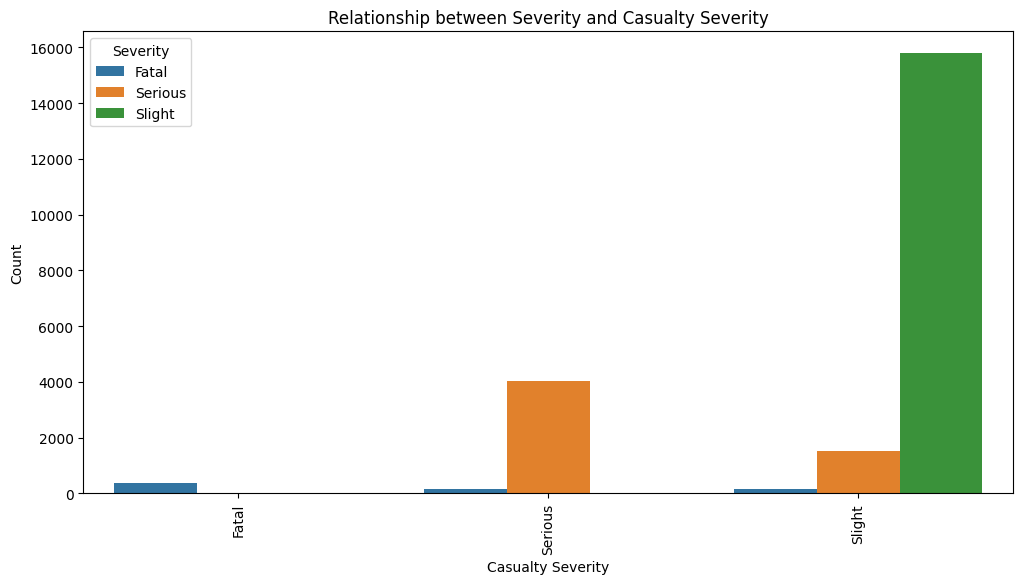

In [95]:
# prompt: what is next

# ### **12. Relationship between Severity and Casualty Severity**
# Contingency Table
Severity_vs_CasualtySeverity = pd.crosstab(Merged_df["Severity"], Merged_df["Casualty_Severity"])
print(Severity_vs_CasualtySeverity)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_CS, p_val_CS, dof_CS, _ = chi2_contingency(Severity_vs_CasualtySeverity)
print(f"P-Value: {p_val_CS}")
print(f"Chi-Square Statistic: {chi2_stat_CS}")
print(f"Degrees of Freedom: {dof_CS}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_CasualtySeverity.sum().sum()
k = Severity_vs_CasualtySeverity.shape[1]
r = Severity_vs_CasualtySeverity.shape[0]
cramersV_CS = np.sqrt(chi2_stat_CS / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_CS)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Casualty_Severity", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Casualty Severity")
plt.xlabel("Casualty Severity")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


Casualty_Vehicle_Group    Car  E-scooter  Electric Bicycle  HGV  LGV  \
Severity                                                               
Fatal                     427          0                 0   22   37   
Serious                  3016         36                13   94  257   
Slight                  10191         60                24  240  572   

Casualty_Vehicle_Group  Mini-bus/Bus/Coach  Motorcycle  Other  Pedal Cycle  \
Severity                                                                     
Fatal                                   76          52      2           35   
Serious                                 45         755    127          971   
Slight                                  53         982    383         2719   

Casualty_Vehicle_Group  Pedestrian  
Severity                            
Fatal                           35  
Serious                        250  
Slight                         561  


P-Value: 1.0474785971279155e-292
Chi-Square Statistic: 1428.5

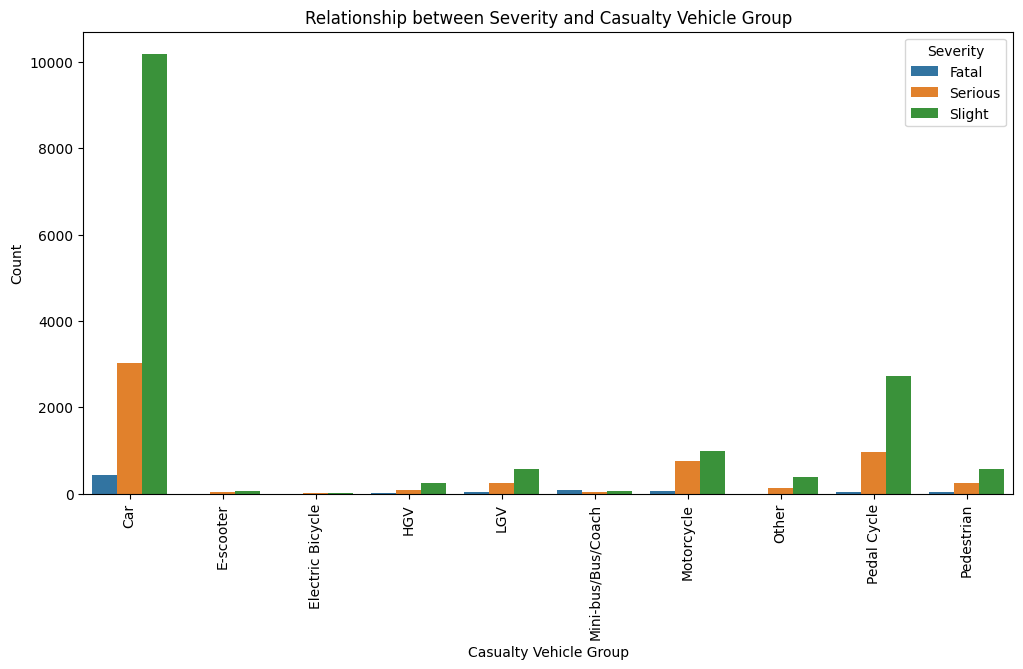

In [96]:
# prompt: what is next

# ### **13. Relationship between Severity and Casualty Vehicle Group**
# Contingency Table
Severity_vs_CasualtyVehicleGroup = pd.crosstab(Merged_df["Severity"], Merged_df["Casualty_Vehicle_Group"])
print(Severity_vs_CasualtyVehicleGroup)

print("\n")

# Perform Chi-Square Test of Independence
chi2_stat_CVG, p_val_CVG, dof_CVG, _ = chi2_contingency(Severity_vs_CasualtyVehicleGroup)
print(f"P-Value: {p_val_CVG}")
print(f"Chi-Square Statistic: {chi2_stat_CVG}")
print(f"Degrees of Freedom: {dof_CVG}")

print("\n")

# Calculate Cramer's V
n = Severity_vs_CasualtyVehicleGroup.sum().sum()
k = Severity_vs_CasualtyVehicleGroup.shape[1]
r = Severity_vs_CasualtyVehicleGroup.shape[0]
cramersV_CVG = np.sqrt(chi2_stat_CVG / (n * min(k - 1, r - 1)))
print("Cramer's V Value:", cramersV_CVG)

print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x = "Casualty_Vehicle_Group", hue = "Severity", data = Merged_df)
plt.title("Relationship between Severity and Casualty Vehicle Group")
plt.xlabel("Casualty Vehicle Group")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


In [97]:
# prompt: can you check if i have done relationship between severity and Time_of_Day, Hour, Year, Day

# Check if 'Time_of_Day' analysis was done
if 'Severity_vs_TimeDay' in locals():
  print("Relationship between Severity and Time_of_Day has been analyzed.")
else:
  print("Relationship between Severity and Time_of_Day has NOT been analyzed.")

# Check if 'Hour' analysis was done
if 'Severity_vs_Hour' in locals():
  print("Relationship between Severity and Hour has been analyzed.")
else:
  print("Relationship between Severity and Hour has NOT been analyzed.")

# Check if 'Year' analysis was done
if 'Severity_vs_Year' in locals():
  print("Relationship between Severity and Year has been analyzed.")
else:
  print("Relationship between Severity and Year has NOT been analyzed.")

# Check if 'Day' analysis was done
if 'Severity_vs_Day' in locals():
  print("Relationship between Severity and Day has been analyzed.")
else:
  print("Relationship between Severity and Day has NOT been analyzed.")


Relationship between Severity and Time_of_Day has been analyzed.
Relationship between Severity and Hour has NOT been analyzed.
Relationship between Severity and Year has NOT been analyzed.
Relationship between Severity and Day has NOT been analyzed.


In [98]:
# prompt: out of all my variables, which ones can i check their relationship with severity

# Categorical variables (use Chi-squared test and Cramer's V):
categorical_vars = ['Time_of_Day', 'Month', 'Speed_Limit', 'Lighting_Conditions',
                    'Weather', 'Road_Conditions', 'Driver_Sex', 'Vehicle_Type_Group',
                    'Casualty_Type', 'Casualty_Severity', 'Casualty_Vehicle_Group']

# Numerical variables (use ANOVA test or similar):
numerical_vars = ['Driver_Age', 'Casualty_Age']

print("You can check the relationship of these categorical variables with Severity:")
for var in categorical_vars:
  print(f"- {var}")

print("\nYou can check the relationship of these numerical variables with Severity:")
for var in numerical_vars:
  print(f"- {var}")


You can check the relationship of these categorical variables with Severity:
- Time_of_Day
- Month
- Speed_Limit
- Lighting_Conditions
- Weather
- Road_Conditions
- Driver_Sex
- Vehicle_Type_Group
- Casualty_Type
- Casualty_Severity
- Casualty_Vehicle_Group

You can check the relationship of these numerical variables with Severity:
- Driver_Age
- Casualty_Age


Severity
Slight     15785
Serious     5564
Fatal        686
Name: count, dtype: int64


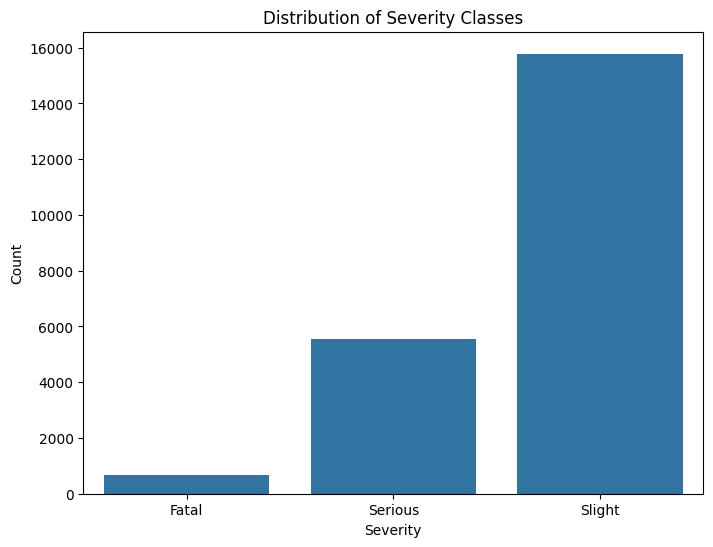

Imbalance Ratio: 23.010204081632654
Severity
Slight     71.636034
Serious    25.250737
Fatal       3.113229
Name: proportion, dtype: float64


In [101]:
# prompt: do you sense data imbalance in what i have done so far?

# Check for class imbalance in the 'Severity' column
severity_counts = Merged_df['Severity'].value_counts()
print(severity_counts)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=Merged_df)
plt.title('Distribution of Severity Classes')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Calculate the imbalance ratio
imbalance_ratio = severity_counts.max() / severity_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio}")

# You can also print the percentage of each class
severity_percentages = Merged_df['Severity'].value_counts(normalize=True) * 100
print(severity_percentages)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the provided dataset
  # Assuming df is your DataFrame
df = Merged_df.copy()

# Define the column names for categorical and continuous variables
categorical_features = ['Severity', 'Hour', 'Time_of_Day', 'Day', 'Month', 'Year', 'Local_Authority',
                        'Speed_Limit', 'Lighting_Conditions', 'Weather', 'Road_Conditions', 'Driver_Sex',
                        'Vehicle_Type_Group', 'Casualty_Type', 'Casualty_Severity', 'Casualty_Vehicle_Group']

continuous_features = ['Number_of_Vehicles', 'Number_of_Casualties', 'Driver_Age', 'Casualty_Age']

# Ensure all categorical features are treated as strings
df[categorical_features] = df[categorical_features].astype(str)

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Preprocessing for continuous data
continuous_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', continuous_transformer, continuous_features)
    ]
)

# Create and apply the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data
processed_data = pipeline.fit_transform(df)

# Convert the processed data to a DataFrame for better readability
processed_df = pd.DataFrame(processed_data, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Print the processed DataFrame
processed_df

In [ ]:
# prompt: what is next

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = processed_df.drop('Severity_Slight', axis=1)  # Assuming 'Severity_Slight' is the target variable
y = processed_df['Severity_Slight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a classification model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
